## Title

### Objective

## Table of Contents

- [Data Analysis Project](#data-analysis-project)
  - [Table of Contents](#table-of-contents)
  - [Data Preprocessing](#data-preprocessing)
    - [Data Loading](#data-loading)
    - [Data Inspection](#data-inspection)
    - [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
      - [Data Cleaning](#data-cleaning)
          -[Handling Missing Data and Structural Errors](handling-missing-data-and-structural-errors)
          -[Other Colums cleanup](other-colums-cleanup)
  - [Feature Engineering and Transformation](#feature-engineering-and-transformation)
    - [Discretization](#discretization)
    - [Categorical Encoding](#categorical-encoding)
    - [Variable Transformation](#variable-transformation)
    - [Scaling](#scaling)
    - [Dimensionality Reduction](#dimensionality-reduction)
  - [Model Implementation](#model-implementation)
    - [Supervised Learning](#supervised-learning)
    - [Model Evaluation](#model-evaluation)
  - [Model Optimization](#model-optimization)
    - [Hyperparameter Tuning](#hyperparameter-tuning)
    - [Regularization](#regularization)
    - [Visualizations](#visualizations)
  - [Presentation](#presentation)
    - [Clear Objectives](#clear-objectives)
    - [Model Performance](#model-performance)
    - [Interactivity (Optional)](#interactivity-optional)

---

### Import Dependencies

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline
import seaborn as sns
from scipy.stats import skew, norm
from sklearn.metrics import confusion_matrix, classification_report

---

## Data Preprocessing

### Data Loading
- Load the `Leads.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_leads = pd.read_csv("Resources/Leads.csv")

# Review the DataFrame
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection
- Handle missing values, column types, and summary statistics.

In [3]:
#checking total rows and cols in dataset
df_leads.shape

(9240, 37)

The Leads.csv has 9,240 rows and 37 columns

In [4]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Exploratory Data Analysis (EDA)

Will keep the index number from the original Dataset, and will be removing or transforming data, analyzing one by one


In [6]:
for i, col in enumerate(df_leads.columns):
    print(f"{i} - {col}")

0 - Prospect ID
1 - Lead Number
2 - Lead Origin
3 - Lead Source
4 - Do Not Email
5 - Do Not Call
6 - Converted
7 - TotalVisits
8 - Total Time Spent on Website
9 - Page Views Per Visit
10 - Last Activity
11 - Country
12 - Specialization
13 - How did you hear about X Education
14 - What is your current occupation
15 - What matters most to you in choosing a course
16 - Search
17 - Magazine
18 - Newspaper Article
19 - X Education Forums
20 - Newspaper
21 - Digital Advertisement
22 - Through Recommendations
23 - Receive More Updates About Our Courses
24 - Tags
25 - Lead Quality
26 - Update me on Supply Chain Content
27 - Get updates on DM Content
28 - Lead Profile
29 - City
30 - Asymmetrique Activity Index
31 - Asymmetrique Profile Index
32 - Asymmetrique Activity Score
33 - Asymmetrique Profile Score
34 - I agree to pay the amount through cheque
35 - A free copy of Mastering The Interview
36 - Last Notable Activity


####  No lo neceisto creoData Cleaning

-  no lo necesito Remove duplicates, handle outliers, fix structural errors, and deal with missing data.

Reviewing if the 0 - Prospect ID and 1 - Lead Number columns have any duplicates

In [7]:
print(df_leads.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [8]:
# Check for duplicate values in the "Lead Number" column
duplicate_count_LN = df_leads["Lead Number"].duplicated().sum()
print(f"Number of duplicate 'Lead Number' entries: {duplicate_count_LN}")

# Check for duplicate values in the "Lead Number" column
duplicate_count_PID = df_leads["Prospect ID"].duplicated().sum()
print(f"Number of duplicate 'Prospect ID' entries: {duplicate_count_PID}")

Number of duplicate 'Lead Number' entries: 0
Number of duplicate 'Prospect ID' entries: 0


0 - Prospect ID and 1 - Lead Number are unique identification numbers, they not relevent to this analysis, so they will be dropped. 

In [9]:
#dropping Lead Number columns 
df_leads.drop(["Lead Number","Prospect ID"], axis=1, inplace = True)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Fixing "Select" values, changing them to NaN, this is due to the fact that user did not select any value from the options

In [10]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

Changing all columns to lower case

In [11]:
# changing  all columns values to lower case
for col in df_leads.columns:
    df_leads[col] = df_leads[col].apply(lambda s: s.lower() if type(s)==str else s)

#####  no Handling Missing Data and Structural Errors

In [12]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [13]:
#Review null values per column
df_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
# Calculate the percentage of null values for each column
null_percentage = (df_leads.isnull().sum() / len(df_leads)* 100) .round(2)

# Display the percentage of null values per column
print(null_percentage)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

###  ---- !!!fix all to 55%

Drop columns with more than 55% missing data

In [15]:
cols = df_leads.columns

for i in cols:
    if (100 * (df_leads[i].isnull().sum() / len(df_leads.index))) >= 55:
        df_leads.drop(i, axis=1, inplace=True)

# Check the updated DataFrame
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

##### Removed columns with more than 45% null content:

Reduced from 37 to 28 columns from previous cleanups, but not done yet, as some columns might contain important information, will analyze each.
Removed columns with more than 45% null content:</br>
11 - Country </br>
13 - How did you hear about X Education </br>

28 - Lead Profile </br>
30 - Asymmetrique Activity Index </br>
31 - Asymmetrique Profile Index </br>
32 - Asymmetrique Activity Score </br>
33 - Asymmetrique Profile Score </br>


In [16]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

##### 2 - Lead Origin

In [17]:
#Lead Origin
df_leads['Lead Origin'].value_counts(dropna=False)

Lead Origin
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: count, dtype: int64

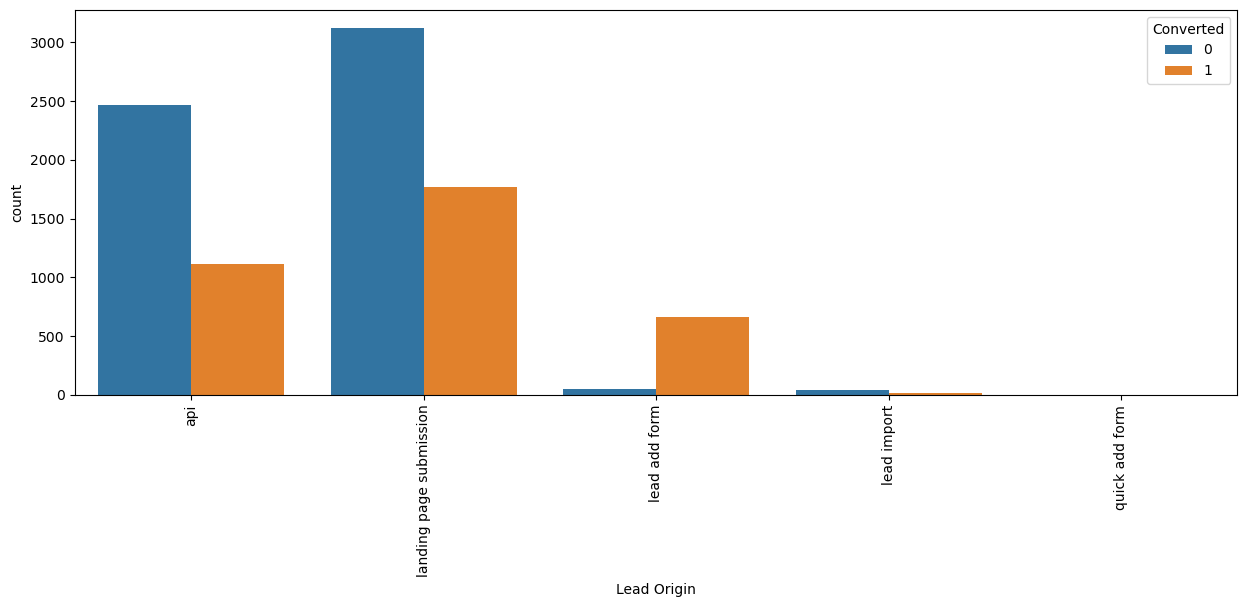

In [18]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

API and Landing Page Submission bring higher number of leads as well as conversion.
Lead Add Form has a very high conversion rate but count of leads are not very high.
Lead Import and Quick Add Form get very few leads.
In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

"Landing Page Submission" and "API" are the primary sources of leads, with Landing Page Submission being slightly more effective in terms of conversion rate.
"Lead Add Form" appears to be more efficient, with a higher proportion of leads converting, despite its lower volume.
Improving the conversion rate of leads from "API" could be a focus, as it has a high number of non-converting leads.

Predictive Power:

The chart shows that different lead origins have different conversion rates. For instance, "Lead Add Form" has a higher conversion rate compared to "API." This indicates that the origin of a lead can provide insight into how likely that lead is to convert, which is valuable information for predicting conversions.
Categorical Impact:

"Lead Origin" is a categorical feature that indicates the source of the lead, which can have a significant influence on conversion behavior. If certain origins are consistently associated with high or low conversions, this column will help the model differentiate between high-quality and low-quality leads.
Feature Encoding:

You can encode "Lead Origin" using techniques like one-hot encoding to allow the model to use this information effectively. The resulting features can then be used by the machine learning model to identify the importance of each lead origin in predicting conversion.
Correlation:

Even if the correlation between "Lead Origin" and the target variable (conversion) isn't very high, categorical features often provide non-linear relationships that machine learning models (especially tree-based models like Random Forest or Gradient Boosting) can capture effectively.
Based on this analysis, I would suggest keeping the "Lead Origin" column in the model. It appears to provide information that could be useful in predicting whether a lead will convert or not. If during feature selection or feature importance analysis it turns out to be less important, it can be dropped, but it is worthwhile to include it initially.

02 - Lead Origin Keep

In [19]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

##### 3 - Lead Source 

In [20]:
#checking for mode value
df_leads['Lead Source'].value_counts()

Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64

Bining

In [21]:

# Standardize category names to lowercase
df_leads['Lead Source'] = df_leads['Lead Source'].str.lower()

# Replace variations with consistent names
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'facebook': 'social media'})
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'youtube': 'social media'})

# Remove rows where 'Lead Source' has irrelevant or test values
df_leads = df_leads[~df_leads['Lead Source'].isin(['testone'])]

# Replace synonyms with a consistent value
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'welearnblog_home': 'welearn', 'WeLearn': 'welearn'})


# Recheck the value counts
print(df_leads['Lead Source'].value_counts())


Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
social media           57
bing                    6
click2call              4
press_release           2
welearn                 2
live chat               2
youtubechannel          1
blog                    1
pay per click ads       1
nc_edm                  1
Name: count, dtype: int64


Remove options with  values under 50

In [22]:
# Define a cutoff value
cutoff_value = 50

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Lead Source'].value_counts()[df_leads['Lead Source'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Lead Source'] = df_leads['Lead Source'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Lead Source'].value_counts())

Lead Source
google              2873
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
welingak website     142
referral sites       125
social media          57
Other                 20
Name: count, dtype: int64


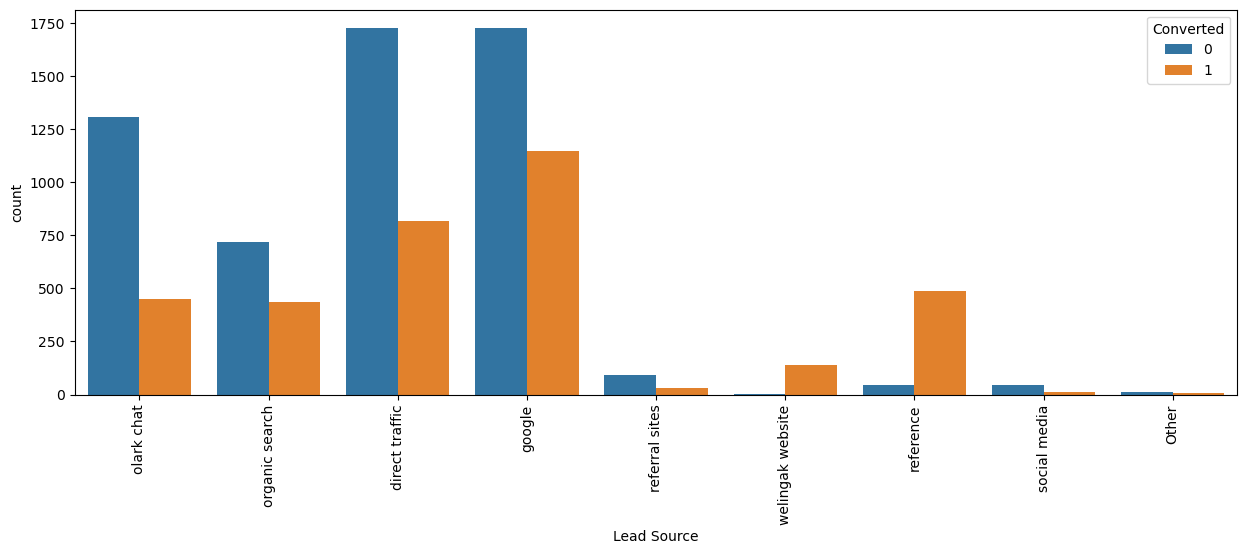

In [23]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()




Different lead sources show varied conversion rates, indicating that the source has an impact on the likelihood of conversion. For instance, references and Google have higher conversion rates compared to direct traffic.


"Lead Source" can help the model capture important distinctions between different types of leads. For example, leads from referrals or specific websites may be of higher quality, and the model can use this information to predict conversion more accurately.


If certain lead sources, like "Direct Traffic," have a low conversion rate, this information can be used for business insights as well, enabling targeted marketing strategies to improve conversion.
To include "Lead Source" in a machine learning model, you would need to encode it properly, such as using one-hot encoding, which allows the model to recognize different sources and learn from their distinct behaviors.

Including "Lead Source" will likely improve the model's performance, as it provides essential context regarding lead quality and conversion likelihood.

3- Lead Sources  - Keep 


#### 4 - Do Not Email & 5 - Do Not Call

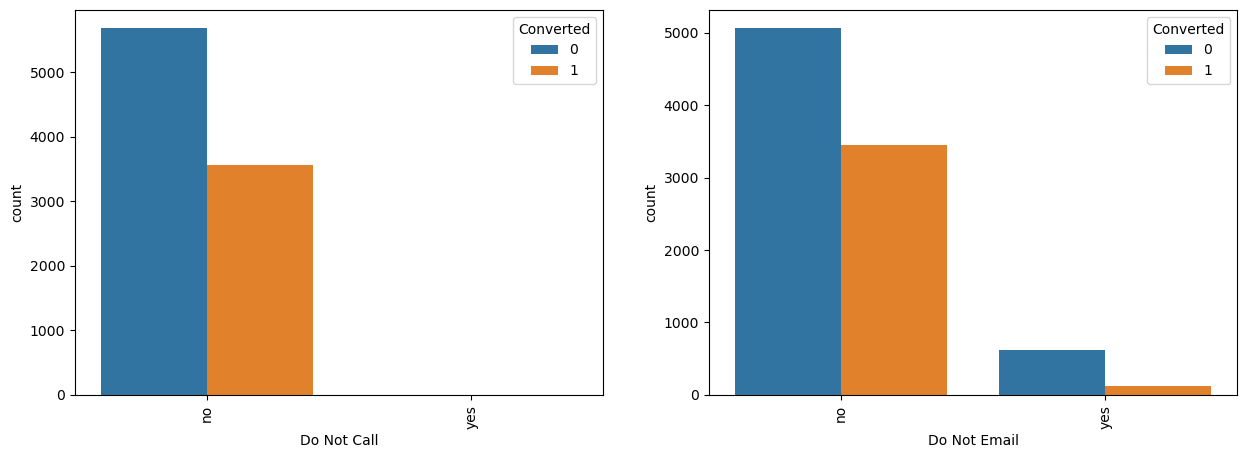

In [24]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))

# Plotting 'Do Not Call' with 'Converted' as hue
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Call', hue='Converted', data=df_leads, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plotting 'Do Not Email' with 'Converted' as hue
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Email', hue='Converted', data=df_leads, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

The "Do Not Email" feature seems to have a stronger effect on conversion compared to "Do Not Call", suggesting that restricting email communication negatively affects conversion rates.
I beleive that the double negation is misleading, and most people rather not getting contact.
Leads that do not want to be contacted (either by call or email) may be less likely to convert, and including this information helps the model understand this behavior
As both charts have a significant amount of convertions, we will keep these columns

4 - Do Not Email - Keep </br>
5 - Do Not Call - Keep

##### 6 - <b> Converted is the dependent variable (y), the one we are trying to achieve, we want to increase the number or 1's (conversions) <b>  

6 - Converted - Keep

In [25]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9239 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9239 non-null   object 
 1   Lead Source                                    9203 non-null   object 
 2   Do Not Email                                   9239 non-null   object 
 3   Do Not Call                                    9239 non-null   object 
 4   Converted                                      9239 non-null   int64  
 5   TotalVisits                                    9102 non-null   float64
 6   Total Time Spent on Website                    9239 non-null   int64  
 7   Page Views Per Visit                           9102 non-null   float64
 8   Last Activity                                  9136 non-null   object 
 9   Country                                        6778 non-n

##### 7 - Total Visits

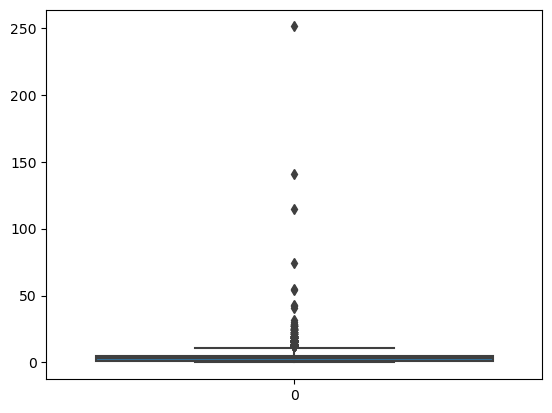

In [26]:
#Total Visits
#visualizing spread of variable

sns.boxplot(df_leads['TotalVisits'])
plt.show()


There are outliers in the data, cap the outliers to 95%for analysis

In [27]:
#checking percentile values for "Total Visits"

df_leads['TotalVisits'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    9102.000000
mean        3.445067
std         4.855092
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

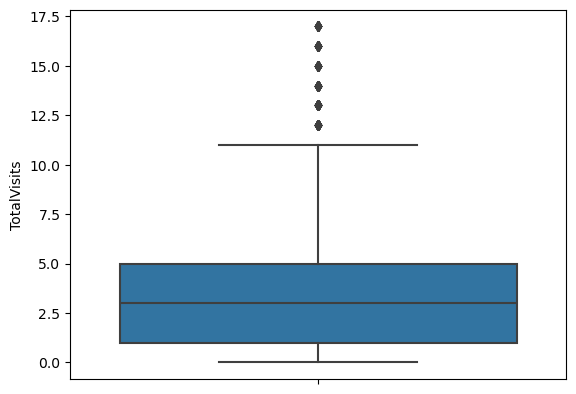

In [28]:
#Outlier Treatment: Remove top & bottom 5% of the Column Outlier values

Q3 = df_leads.TotalVisits.quantile(0.99)
df_leads = df_leads[(df_leads.TotalVisits <= Q3)]
Q1 = df_leads.TotalVisits.quantile(0.01)
df_leads = df_leads[(df_leads.TotalVisits >= Q1)]
sns.boxplot(y=df_leads['TotalVisits'])
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

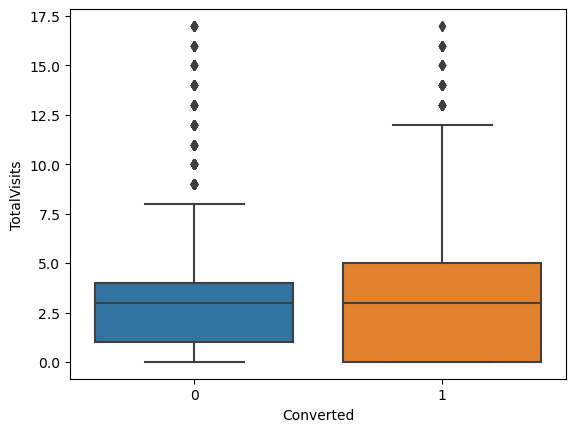

In [29]:

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)

wever, the upper quartile (75th percentile) is higher for converted leads, indicating that leads that convert tend to have a higher number of total visits compared to those that do not convert.

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


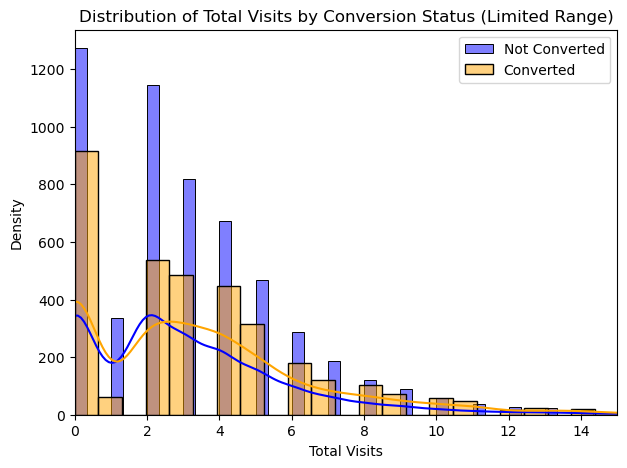

In [30]:
# Plotting the distribution of Total Visits split by Converted and Not Converted with x-axis limit
plt.figure(figsize=(7, 5))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]['TotalVisits'], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]['TotalVisits'], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of Total Visits by Conversion Status (Limited Range)')
plt.xlabel('Total Visits')
plt.ylabel('Density')
plt.xlim(0, 15)  # Limiting the x-axis to 0-15 for better visualization
plt.legend()

plt.show()

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


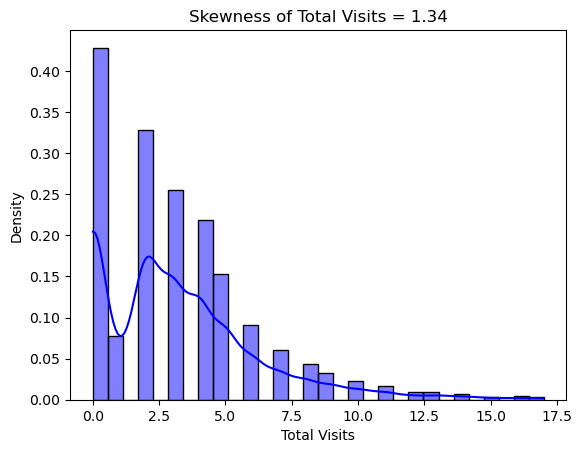

In [31]:
# Calculate skewness
skewness = skew(df_leads['TotalVisits'])
skewness_rounded = round(skewness, 2)

# Plotting the distribution
sns.histplot(df_leads['TotalVisits'], kde=True,  color='blue', stat="density", bins=30)
plt.title(f"Skewness of Total Visits = {skewness_rounded}")
plt.xlabel('Total Visits')
plt.ylabel('Density')
plt.show()

The distribution is heavily skewed to the left, with the highest peak around 0-2 visits.
The overall pattern shows that many leads that do not convert tend to have fewer visits.
However, compared to non-converted leads, a higher number of converted leads continue to visit beyond 3 times.
he density for converted leads is higher at 4-6 visits compared to non-converted, indicating that more visits are generally associated with a higher likelihood of conversion.

7 - Total Visits - Keep

##### 8 - Total Time Spent on Website

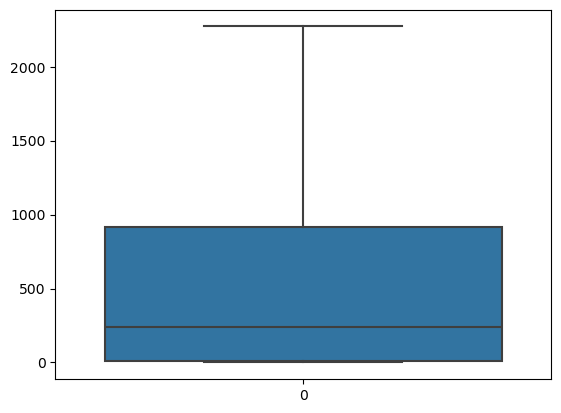

In [32]:

#visualizing boxplot 

sns.boxplot(df_leads['Total Time Spent on Website'])
plt.show()

There is a single point plotted above the upper whisker, which indicates an outlier in the dataset.
The data appears to be right-skewed, with some leads having values far greater than most other leads.

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


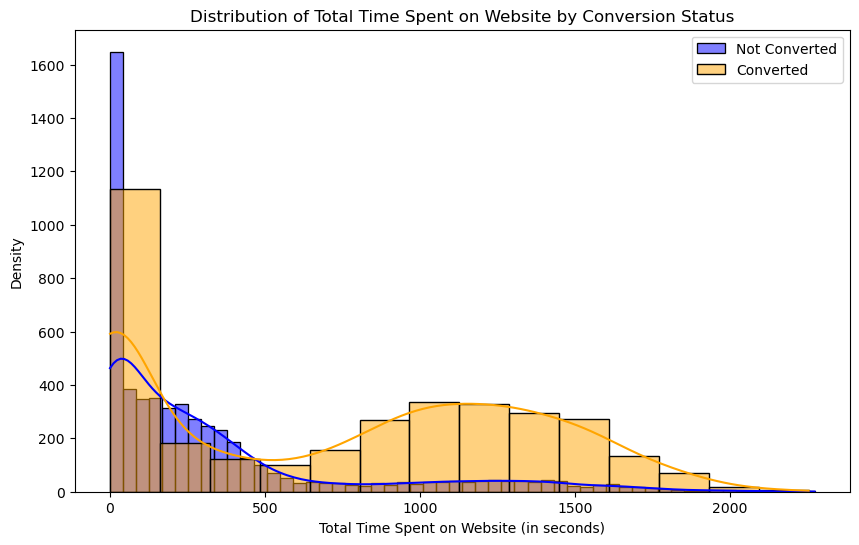

In [33]:
# Plotting the distribution of "Total Time Spent on Website" split by Converted and Not Converted
plt.figure(figsize=(10, 6))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]['Total Time Spent on Website'], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]['Total Time Spent on Website'], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of Total Time Spent on Website by Conversion Status')
plt.xlabel('Total Time Spent on Website (in seconds)')
plt.ylabel('Density')
plt.legend()

plt.show()

uggesting that those who converted generally spent more time on the website compared to those who did not convert.
-converted leads are heavily skewed to the left, with the highest density at very short times spent.
Non-converted leads are heavily skewed to the left, with the highest density at very short times spent.
Converted leads tend to spend more time on the website, as indicated by the higher density in the mid-range (500-1500 seconds).


8 -  Total Time Spent on Website - Keep

##### 9 - Page Views Per Visit

In [34]:
null_percentage = df_leads['Page Views Per Visit'].isnull().mean() * 100
print(f"Percentage of null values in 'Page Views Per Visit': {null_percentage:.2f}%")

Percentage of null values in 'Page Views Per Visit': 0.00%


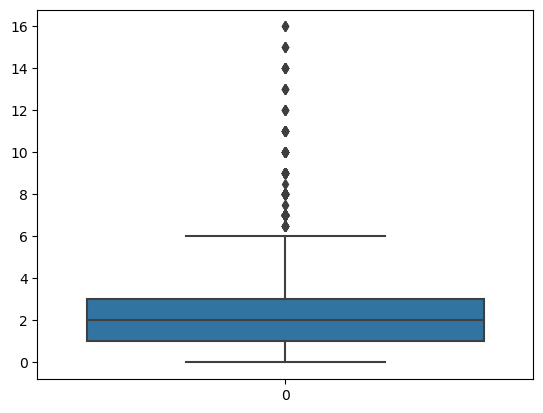

In [35]:

#visualizing boxplot 

sns.boxplot(df_leads['Page Views Per Visit'])
plt.show()

The IQR (from 1 to 4) indicates that the spread of most of the data is relatively narrow, with many values clustering between 1 and 4.
There are several outliers above 6, suggesting that some data points are much higher than the general trend.
the presence of outliers suggests that some users view an unusually high number of pages per visit, which could be considered when modeling or further analyzing user behavior. Depending on the context, you might consider handling these outliers (e.g., through capping or transformation) to improve model performance or understand user patterns better.

In [36]:
#capping 
#checking percentile values for "Page Views Per Visit"

df_leads['Page Views Per Visit'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    9019.000000
mean        2.337252
std         2.062476
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

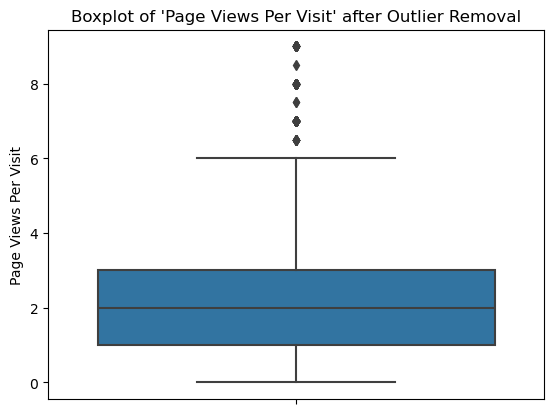

In [37]:
#Outlier Treatment: Remove top & bottom 5% of the Column Outlier values

# Remove top & bottom 5% of the Column Outlier values
Q3 = df_leads["Page Views Per Visit"].quantile(0.99)
Q1 = df_leads["Page Views Per Visit"].quantile(0.01)

# Filtering the data to remove top and bottom 5%
df_leads = df_leads[(df_leads["Page Views Per Visit"] <= Q3) & (df_leads["Page Views Per Visit"] >= Q1)]

# Plotting the boxplot after outlier treatment
sns.boxplot(y=df_leads["Page Views Per Visit"])
plt.title("Boxplot of 'Page Views Per Visit' after Outlier Removal")
plt.show()

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


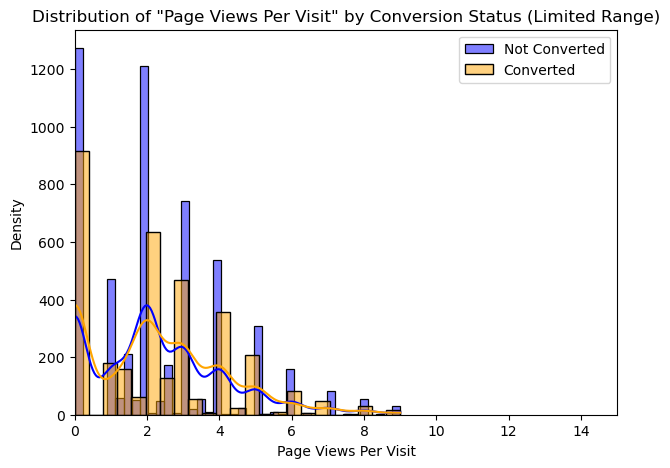

In [38]:
# Plotting the distribution of Total Visits split by Converted and Not Converted with x-axis limit
plt.figure(figsize=(7, 5))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]["Page Views Per Visit"], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]["Page Views Per Visit"], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of "Page Views Per Visit" by Conversion Status (Limited Range)')
plt.xlabel("Page Views Per Visit")
plt.ylabel('Density')
plt.xlim(0, 15)  # Limiting the x-axis to 0-15 for better visualization
plt.legend()

plt.show()

The distribution shows more blue bars compared to orange bars for higher counts of page views, which means that non-converted leads had more page views across different ranges. This indicates that having multiple page views alone does not guarantee conversion.
Converted leads show a higher distribution for 3-5 page views, indicating that a moderate level of exploration is correlated with a higher chance of conversion.
After 6 page views, the number of both converted and non-converted leads drops significantly, suggesting that extended browsing does not strongly influence conversion.

9 - Page Views Per Visit - Keep

##### 10 - Last Activity

In [39]:
#checking percentile values for "Total Visits"

df_leads['TotalVisits'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    8952.000000
mean        3.142873
std         2.903895
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%         9.000000
99%        13.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [40]:
# Last Activity checking for mode value
df_leads['Last Activity'].value_counts()

Last Activity
email opened                    3390
sms sent                        2700
olark chat conversation          966
page visited on website          593
converted to lead                428
email bounced                    310
email link clicked               264
form submitted on website        114
unreachable                       88
unsubscribed                      60
had a phone conversation          24
approached upfront                 5
view in browser link clicked       4
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: count, dtype: int64

In [41]:
# Impute nan values with email opened  
df_leads['Last Activity'] = df_leads['Last Activity'].replace(np.nan ,'Email Opened')

In [42]:
# Last Activity checking for mode value
df_leads['Last Activity'].value_counts()

Last Activity
email opened                    3390
sms sent                        2700
olark chat conversation          966
page visited on website          593
converted to lead                428
email bounced                    310
email link clicked               264
form submitted on website        114
unreachable                       88
unsubscribed                      60
had a phone conversation          24
approached upfront                 5
view in browser link clicked       4
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: count, dtype: int64

In [43]:
# Define a cutoff value
cutoff_value = 100

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Last Activity'].value_counts()[df_leads['Last Activity'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Last Activity'] = df_leads['Last Activity'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Last Activity'].value_counts())

Last Activity
email opened                 3390
sms sent                     2700
olark chat conversation       966
page visited on website       593
converted to lead             428
email bounced                 310
email link clicked            264
Other                         187
form submitted on website     114
Name: count, dtype: int64


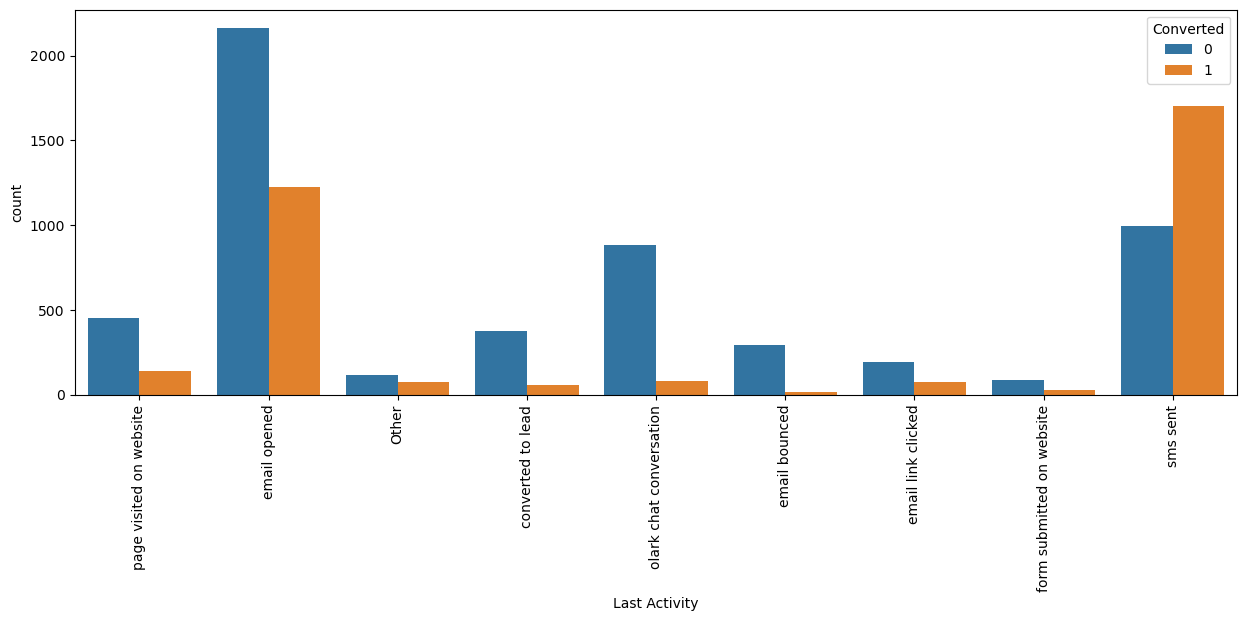

In [44]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

ggesting that while email engagement is common, it does not guarantee conversion.
SMS Sent stands out as a major activity with a high conversion rate.
The orange bar (converted) is higher than the blue bar (not converted), indicating that sending an SMS has a positive impact on conversion. This activity is associated with more conversions than non-conversions.
The blue bar is much higher compared to the orange bar, indicating that leads with Olark Chat Conversation are more likely to not convert.
This suggests that while chatting might engage the lead, it doesn’t necessarily lead to conversion.
SMS Sent appears to be a strong driver of conversion. Leads who were sent an SMS are more likely to convert, indicating that SMS is an effective follow-up method.
Email Opened is also a common last activity, but most of these leads do not convert, suggesting that simply opening an email is not sufficient to drive conversions.
Olark Chat Conversation has a higher likelihood of non-conversion, which could mean that leads engaged through chat require further actions to convert.

10 - Last Activity - Keep

In [45]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Country                                        6629 non-n

##### 11 - Country

In [46]:
null_percentage = df_leads['Page Views Per Visit'].isnull().mean() * 100
print(f"Percentage of null values in 'Country': {null_percentage:.2f}%")

Percentage of null values in 'Country': 0.00%


In [47]:
# country 
df_leads.Country.value_counts()

Country
india                   6346
united states             68
united arab emirates      52
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
canada                     4
unknown                    4
south africa               4
germany                    4
nigeria                    4
kuwait                     4
sweden                     3
china                      2
bangladesh                 2
belgium                    2
asia/pacific region        2
uganda                     2
philippines                2
italy                      2
ghana                      2
liberia                    1
vietnam                    1
denmark                    1
switzerland                1
tanzania                   1
netherlands                1
malaysia                   1
kenya 

In [48]:
#imputing missing values with India as it's the mode
df_leads['Country'] = df_leads['Country'].replace(np.nan,'india')

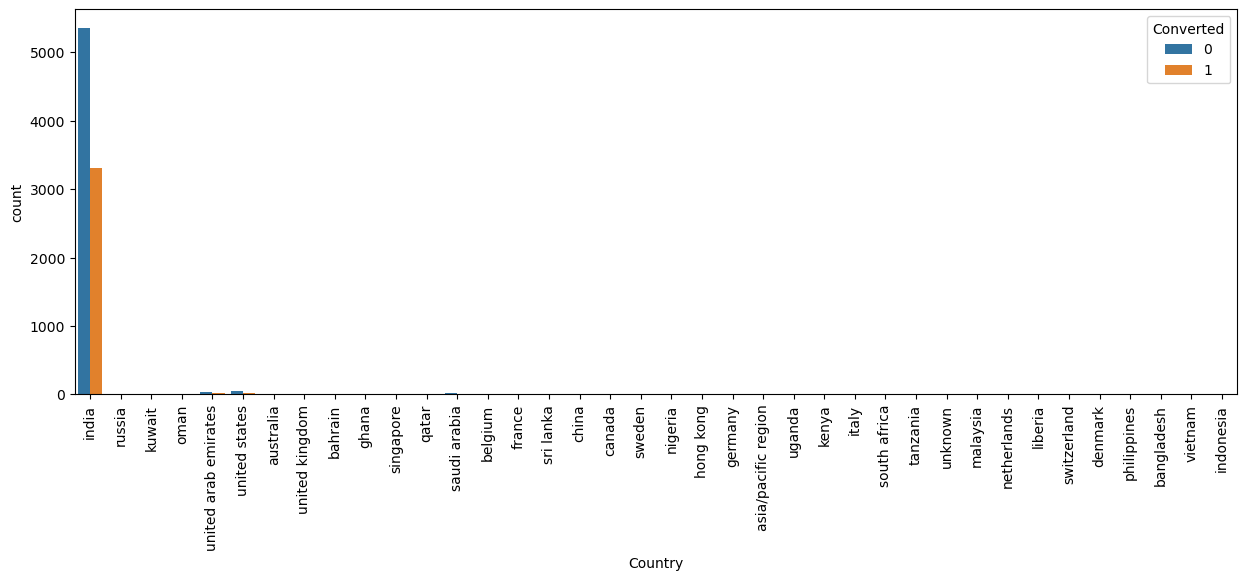

In [49]:
#plot  spread of Country after replacing null values

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Country', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

In [50]:
# Calculate the percentage of rows with "India" in the Country column
india_percentage = (df_leads['Country'].value_counts()['india'] / df_leads['Country'].count()) * 100

# Print the percentage
print(f"'india' within Country column: {india_percentage:.2f}%")

'india' within Country column: 96.84%


Because >96% of the data is mapped as india, making Country data heavily skewed and not required for the modeling process, will drop this column from the DF. 

In [51]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [52]:
# dropping country column
df_leads.drop('Country',axis=1,inplace =True)

In [53]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Specialization                                 5668 non-n

##### 12 - Specialization

In [54]:
# Calculate the percentage of null values in the "Specialization" column
null_percentage = df_leads['Specialization'].isnull().mean() * 100

# Print the percentage of null values
print(f"Percentage of null values in 'Specialization': {null_percentage:.2f}%")

Percentage of null values in 'Specialization': 36.68%


In [55]:
#describe specialization
df_leads.Specialization.describe()

count                   5668
unique                    18
top       finance management
freq                     945
Name: Specialization, dtype: object

In [56]:
# Imputing NaN values with "Not Specified"

df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Not Specified')

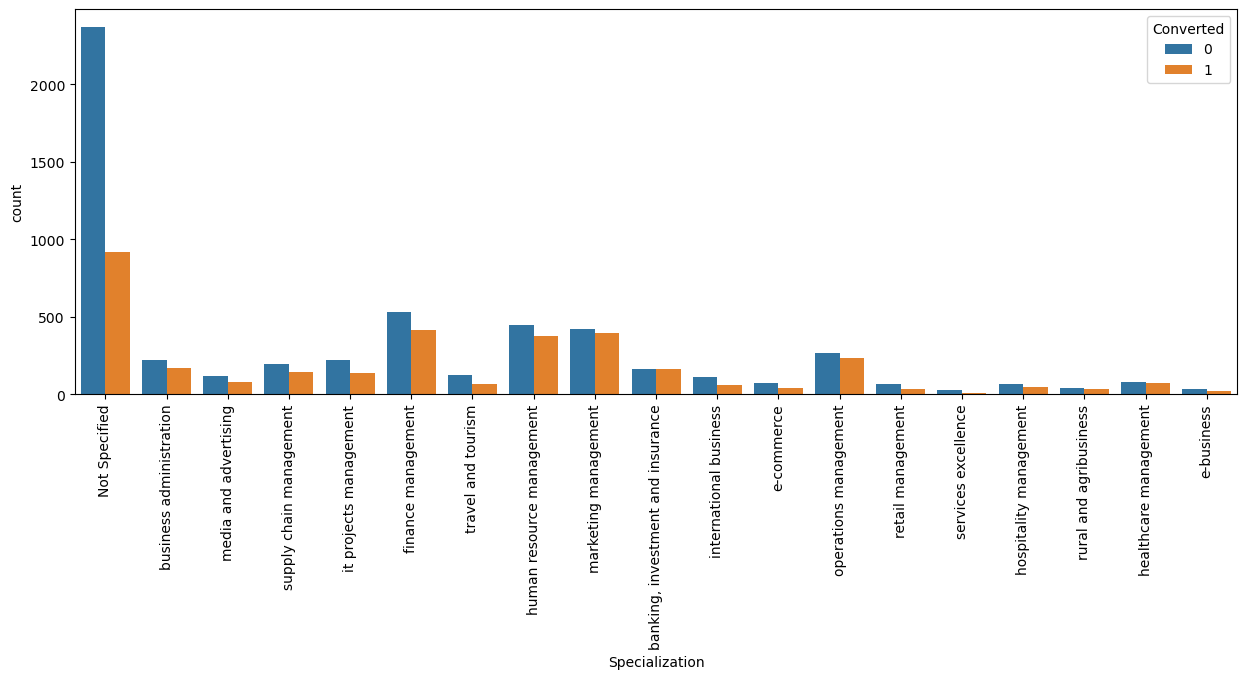

In [57]:
#plotting spread of Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()



In [58]:
#bining Management Specializations because they show similar trends

df_leads['Specialization'] = np.where(df_leads['Specialization'].isin(['finance management', 'human resource management',
                                                                       'marketing management', 'operations management',
                                                                       'it projects management', 'supply chain management',
                                                                       'healthcare Management', 'hospitality management',
                                                                       'retail management']),
                                       'Management_Specializations', df_leads['Specialization'])

In [59]:
# specializations
df_leads.Specialization.value_counts()

Specialization
Management_Specializations           3974
Not Specified                        3284
business administration               390
banking, investment and insurance     325
media and advertising                 197
travel and tourism                    189
international business                171
healthcare management                 151
e-commerce                            107
rural and agribusiness                 70
e-business                             56
services excellence                    38
Name: count, dtype: int64

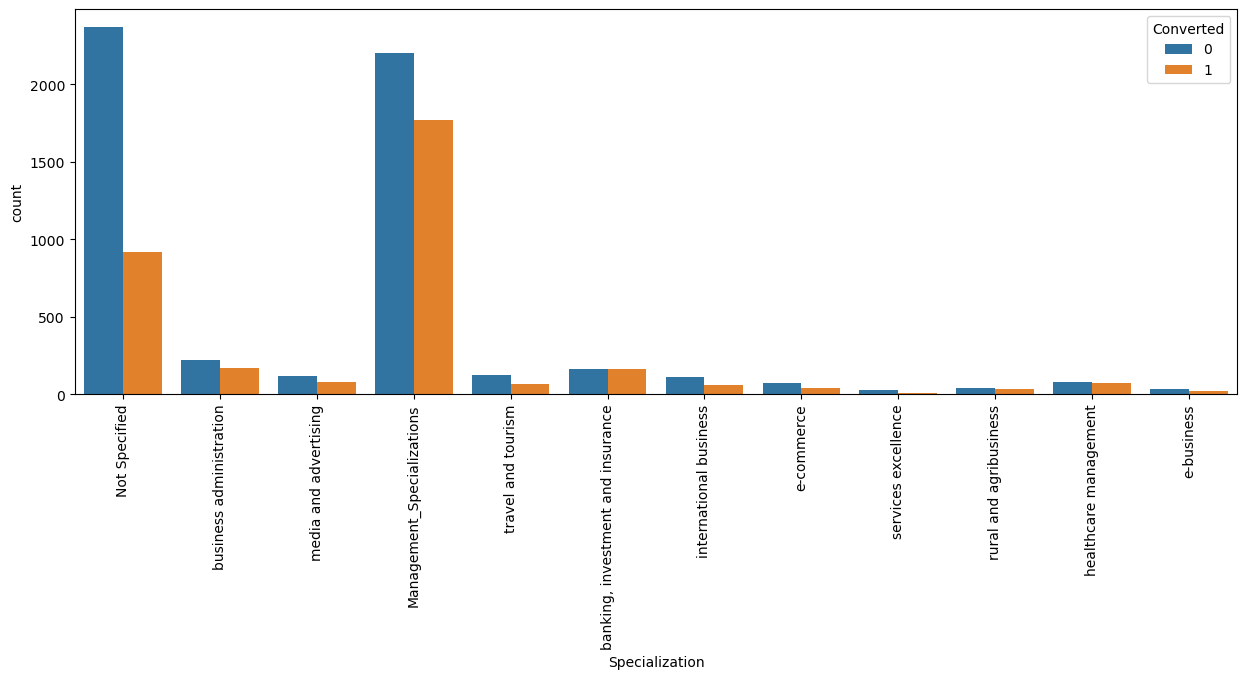

In [60]:
#plotting the spred of new Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()


!!!We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

Focus should be more on the Specialization with high conversion rate.

The "Not Specified" category has the highest number of leads but also a higher proportion of non-converted leads. This suggests that a lack of information regarding specialization might correlate with lower engagement or lower interest.
Management Specializations appears to be the most promising category, with a high conversion rate relative to the total leads. This could indicate that individuals with management-related interests are more likely to convert.
Specializations such as Business Administration and Media and Advertising have balanced counts of converted and non-converted leads, suggesting moderate potential for conversion.

12 - Specialization - Keep

In [61]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Specialization                                 8952 non-n

##### 13 How did you hear about X Educuation

Deleted with %5% cut-off </br>
13 - How did you hear about X Educuation - Dropped

In [62]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Specialization                                 8952 non-n

##### 14 - What is your current occupation?

In [63]:
#What is your current occupation

df_leads['What is your current occupation'].value_counts(dropna=False)



What is your current occupation
unemployed              5409
NaN                     2643
working professional     667
student                  204
other                     13
housewife                  9
businessman                7
Name: count, dtype: int64

In [64]:
# Imputing NaN values with "unemployed"

df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'unemployed')

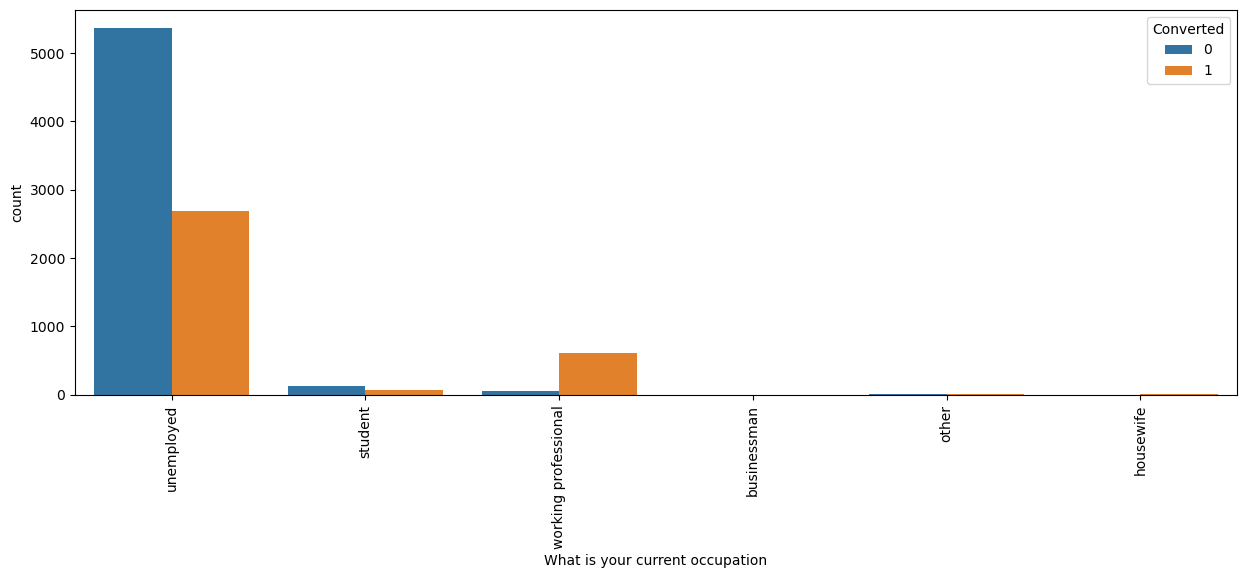

In [65]:
#plotting spread of  What is your current occupation? columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

!!!!Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in terms of Absolute numbers.Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

The "Unemployed" category has the highest number of leads and also a considerable number of conversions. This suggests that unemployed individuals might be actively seeking opportunities to improve their skills, making them an important target segment.
Working Professionals show a high conversion rate despite lower representation. This indicates that this segment is highly engaged and interested in offerings.
Other categories like Student, Housewife, Businessman, and Other have very low counts, suggesting these groups are less targeted or less interested.

14 - What is your Current Occupation  - Keep

In [66]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Specialization                                 8952 non-n

##### 15 What matters most to you in choosing a course

In [67]:
#checking value counts

df_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
better career prospects      6289
NaN                          2661
flexibility & convenience       1
other                           1
Name: count, dtype: int64

In [68]:
# Imputing NaN values with "better carreer prospects" (mode)

df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].replace(np.nan, 'better career prospects')

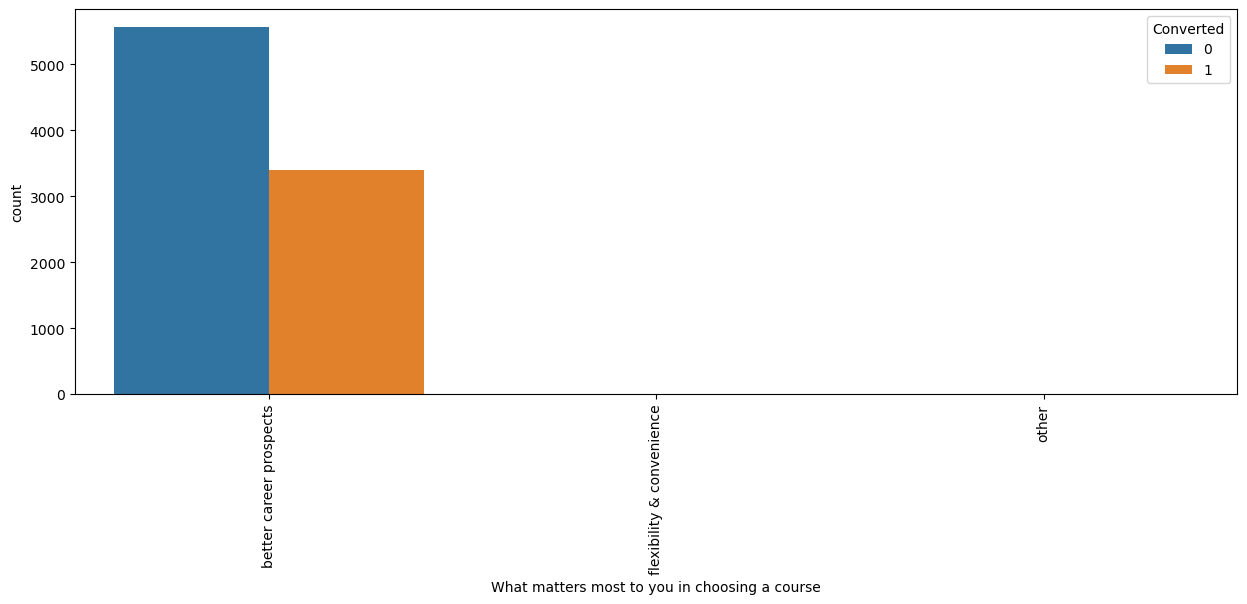

In [69]:
#plotting spread of What matters most to you in choosing a course columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'What matters most to you in choosing a course', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Better Career Prospects is by far the most significant factor for leads, suggesting that people are highly motivated by the potential for improving their careers when considering a course.
Despite the high number of leads, the conversion rate is relatively low for those prioritizing better career prospects. This could suggest that while many are interested in career growth, other barriers might be preventing them from converting (e.g., financial concerns, time constraints, etc.).

15 What matters most to you in choosing a course - keep

In [70]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Specialization                                 8952 non-n

##### 16 Search </br> 
17 Magazine</br>
18 Newspaper Article</br>
19  X Education Forums</br>
20 Newspaper</br>
21 Digital Advertisement</br>
22 Through Recommendations</br>
23 Receive More Updates About Our Courses.

In [71]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Specialization                                 8952 non-n

In [72]:
df_leads.Search.value_counts(dropna=False)

Search
no     8939
yes      13
Name: count, dtype: int64

In [73]:
# Calculate the percentage of "no" in the "Search" column
no_percentage = (df_leads['Search'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Search': {no_percentage:.2f}%")

Percentage of 'no' in 'Search': 99.85%


In [74]:
df_leads.Magazine.value_counts(dropna=False)
# Calculate the percentage of "no" in the "Magazine" column
no_percentage = (df_leads['Magazine'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Magazine': {no_percentage:.2f}%")

Percentage of 'no' in 'Magazine': 100.00%


In [75]:
# Calculate the percentage of "no" in the "Newspaper Article" column
no_percentage = (df_leads['Newspaper Article'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Newspaper Article': {no_percentage:.2f}%")

Percentage of 'no' in 'Newspaper Article': 99.99%


In [76]:
# Calculate the percentage of "no" in the "X Education Forums" column
no_percentage = (df_leads['X Education Forums'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'X Education Forums': {no_percentage:.2f}%")

Percentage of 'no' in 'X Education Forums': 100.00%


In [77]:
# Calculate the percentage of "no" in the "Newspaper" column
no_percentage = (df_leads['Newspaper'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Newspaper': {no_percentage:.2f}%")

Percentage of 'no' in 'Newspaper': 99.99%


In [78]:
# Calculate the percentage of "no" in the "Digital Advertisement" column
no_percentage = (df_leads['Digital Advertisement'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Digital Advertisement': {no_percentage:.2f}%")

Percentage of 'no' in 'Digital Advertisement': 99.97%


In [79]:
# Calculate the percentage of "no" in the "Through Recommendations" column
no_percentage = (df_leads['Through Recommendations'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Through Recommendations': {no_percentage:.2f}%")

Percentage of 'no' in 'Through Recommendations': 99.93%


In [80]:
# Calculate the percentage of "no" in the "Receive More Updates About Our Courses" column
no_percentage = (df_leads['Receive More Updates About Our Courses'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Receive More Updates About Our Courses': {no_percentage:.2f}%")

Percentage of 'no' in 'Receive More Updates About Our Courses': 100.00%


In [81]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Specialization                                 8952 non-n

Noticing an imbalance in each one, will try to combine into one column and see if they have a better output

In [82]:
# List of columns to combine
columns_to_combine = [
    'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
    'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
    'Receive More Updates About Our Courses'
]

# Create a new column "Marketing Engagement"
df_leads['Marketing Engagement'] = df_leads[columns_to_combine].apply(lambda x: 1 if (x == 'yes').any() else 0, axis=1)

# Drop the original columns, as they are combined into a new feature
df_leads = df_leads.drop(columns=columns_to_combine)

# Check the distribution of the new feature
print(df_leads['Marketing Engagement'].value_counts(normalize=True) * 100)

Marketing Engagement
0    99.754245
1     0.245755
Name: proportion, dtype: float64


In [83]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Specialization                                 8952 non-n

Due to extreme imbalance in these colums (>99% of No's), they will be dropped. It likely won't provide useful information for the model to make accurate predictions, and may instead contribute to overfitting or add unnecessary complexity.

16 Search - Dropped </br>
17 Magazine - Drpped </br>
18 Newspaper Article  - Dropped </br>
19  X Education Forums  - Dropped </br>
20 Newspaper  - Dropped </br>
21 Digital Advertisement  - Dropped </br>
22 Through Recommendations  - Dropped </br>
23 Receive More Updates About Our Courses - Dropped </br>

In [84]:
#dropping columns 
#df_leads.drop(["Marketing Engagement" ], axis=1, inplace = True)
#data check
#df_leads.info()

##### 24 Tags

In [85]:
# Calculate the percentage of null values in the "Specialization" column
null_percentage = df_leads['Specialization'].isnull().mean() * 100

# Print the percentage of null values
print(f"Percentage of null values in 'Specialization': {null_percentage:.2f}%")

Percentage of null values in 'Specialization': 0.00%


In [86]:
#checking value counts of Tag variable
df_leads['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3284
will revert after reading the email                  2002
ringing                                              1162
interested in other courses                           505
already a student                                     461
closed by horizzon                                    290
switched off                                          237
busy                                                  183
lost to eins                                          169
not doing further education                           136
interested  in full time mba                          116
graduation in progress                                110
invalid number                                         81
diploma holder (not eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    26
in touch 

Because the NaN values are grater than the mode, cannot impute the NaN values with Mode, let's impute it with "Not Specified"

In [87]:
#replacing Nan values with "Tags"
df_leads['Tags'] = df_leads['Tags'].replace(np.nan,'Not Specified')

In [88]:
# Binning, Define a cutoff value
cutoff_value = 100

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Tags'].value_counts()[df_leads['Tags'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Tags'] = df_leads['Tags'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Tags'].value_counts())

Tags
Not Specified                          3284
will revert after reading the email    2002
ringing                                1162
interested in other courses             505
already a student                       461
Other                                   297
closed by horizzon                      290
switched off                            237
busy                                    183
lost to eins                            169
not doing further education             136
interested  in full time mba            116
graduation in progress                  110
Name: count, dtype: int64


In [89]:
#binning  tags with low frequency 
df_leads['Tags'] = df_leads['Tags'].replace(['switched off', 'busy','lost to eins',
                                     'not doing further education','interested  in full time mba'], 'Not Interested/Low Engagement')

df_leads['Tags'] = df_leads['Tags'].replace(['already a student',
                                       'interested in other courses'] , 'Already Engaged/Irrelevant')

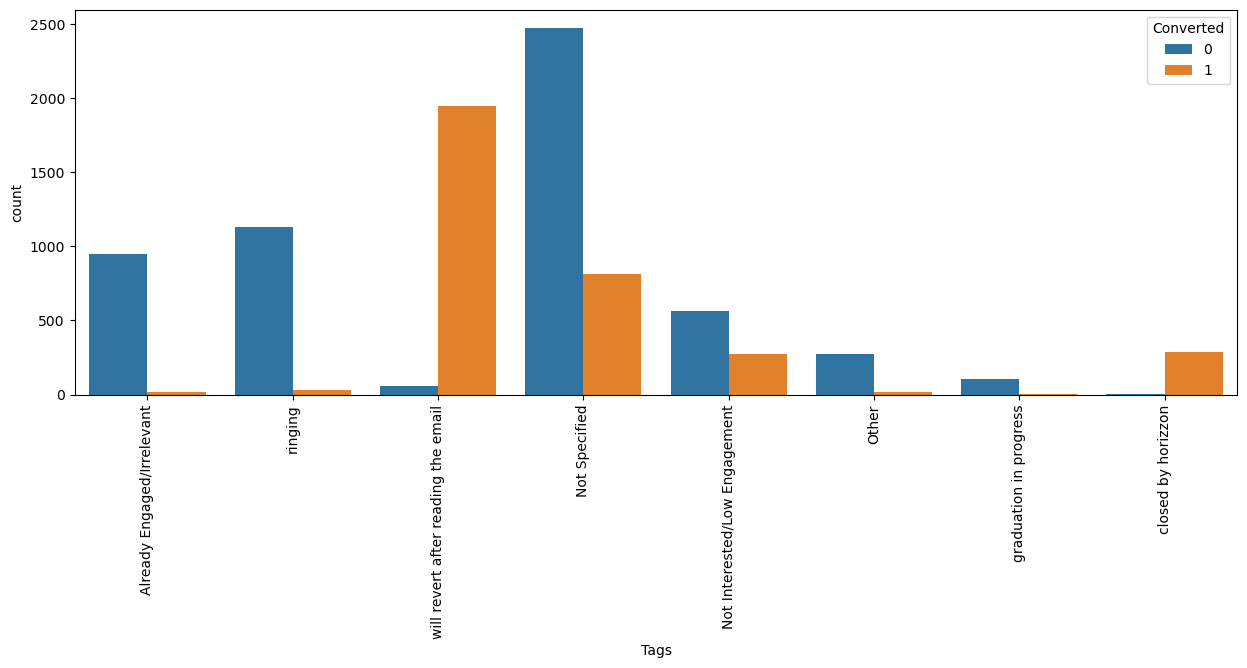

In [90]:
#plotting spread of Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Tags', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Key Insights:
"Will Revert After Reading the Email" appears to be a strong indicator of conversion, suggesting that these leads have higher intent and engagement.
"Not Specified" has the highest number of non-converted leads, which could mean that a lack of a specific tag correlates with a lower likelihood of conversion.
"Ringing" and "Already a Student" tags are associated more with non-conversion, indicating a lower likelihood of converting or possibly representing existing customers rather than new leads.

Feature enginiring combining low engagemtne tags

24. Tags - Keep

25 - Lead Quality

In [91]:
#checking value counts of Tag variable
df_leads['Lead Quality'].value_counts(dropna=False)

Lead Quality
NaN                  4661
might be             1504
not sure             1066
worst                 592
high in relevance     583
low in relevance      546
Name: count, dtype: int64

NaN values will be reclassified as "not sure", because the NaN values are grater than the mode, cannot impute the NaN values with Mode

In [92]:
#replacing Nan values with "Lead Quality"
df_leads['Lead Quality'] = df_leads['Lead Quality'].replace(np.nan,'not sure')

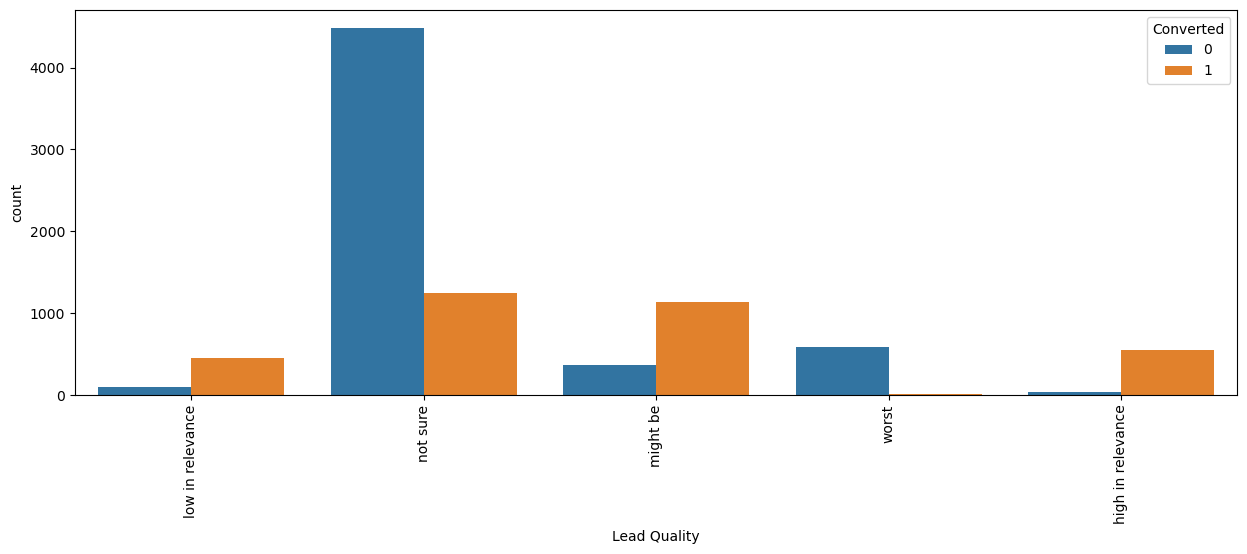

In [93]:
#plotting spread of Lead Quality columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Lead Quality', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

For this Feature I had to reset the cut off for Null from initial 45% that was stablished to 55% to be able to get this colum, which I considered had valueable information eventhough it had a high percentage of empty values. This value is based on the data and intuition the the employee who has been assigned to the lead. (Resources/ Leads Data Dictionary.xlsx)
It was the right choice as there are valueable insights and the feature is highly informative.

High Conversion Categories:

"High in Relevance" leads have an almost perfect conversion rate, suggesting that these leads should be pursued aggressively.
The "Low in Relevance" category also has a surprising number of conversions, indicating potential that should not be completely disregarded.
Mixed Conversion Category:

"Might Be" has a balanced conversion rate, indicating that these leads are uncertain but still have a reasonable chance of converting with appropriate follow-up.
Low Conversion Categories:

"Not Sure" and "Worst" categories show poor conversion rates. The "Not Sure" category especially has a high number of non-converted leads, indicating that this group requires a more careful and targeted approach if pursued.

25 Lead Quality - Keep

##### 26 Update me on Suppy Chain Content </br> 27 Get updates on DM Content

In [94]:
# Calculate the percentage of "no" in the "Update me on Supply Chain Content" column
no_percentage = (df_leads['Update me on Supply Chain Content'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Update me on Supply Chain Content': {no_percentage:.2f}%")

Percentage of 'no' in 'Update me on Supply Chain Content': 100.00%


In [95]:
# Calculate the percentage of "no" in the "Get updates on DM Content" column
no_percentage = (df_leads['Get updates on DM Content'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Get updates on DM Content': {no_percentage:.2f}%")

Percentage of 'no' in 'Get updates on DM Content': 100.00%


Due to extreme imbalance in this colum (100% of No's), it will be dropped. It likely it won't provide useful information for the model to make accurate predictions, and may instead contribute to overfitting or add unnecessary complexity.

26 Update me on Supply Chain Content - Dropped </br>
27 Get updates on DM Content - Dropped

In [96]:
#dropping Update me on Supply Chain Content column 
df_leads.drop(["Update me on Supply Chain Content", "Get updates on DM Content"], axis=1, inplace = True)
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Specialization                                 8952 non-n

##### 28 Lead Profile


Deleted with 55% cut-off, as this column had 74.19 null values </br>
28 - Lead Profile  - Dropped

** would like to come back and analyize the data, though

##### 29 City

In [97]:
#checking value counts of City variable
df_leads['City'].value_counts(dropna=False)

City
NaN                            3578
mumbai                         3109
thane & outskirts               722
other cities                    669
other cities of maharashtra     438
other metro cities              364
tier ii cities                   72
Name: count, dtype: int64

in this case, even that NaN is grater than the mode, let's impute with the mode Mumbai

In [98]:
df_leads['City'] = df_leads['City'].replace(np.nan,'mumbai')

In [99]:
# Grouping cities into broader categories based on region/size
df_leads['City'] = df_leads['City'].replace(['other metro cities','thane & outskirts'], 'other metro')

df_leads['City'] = df_leads['City'].replace(['other cities',
                                       'other cities of maharashtra', 'tier ii cities'] , 'non-metro')


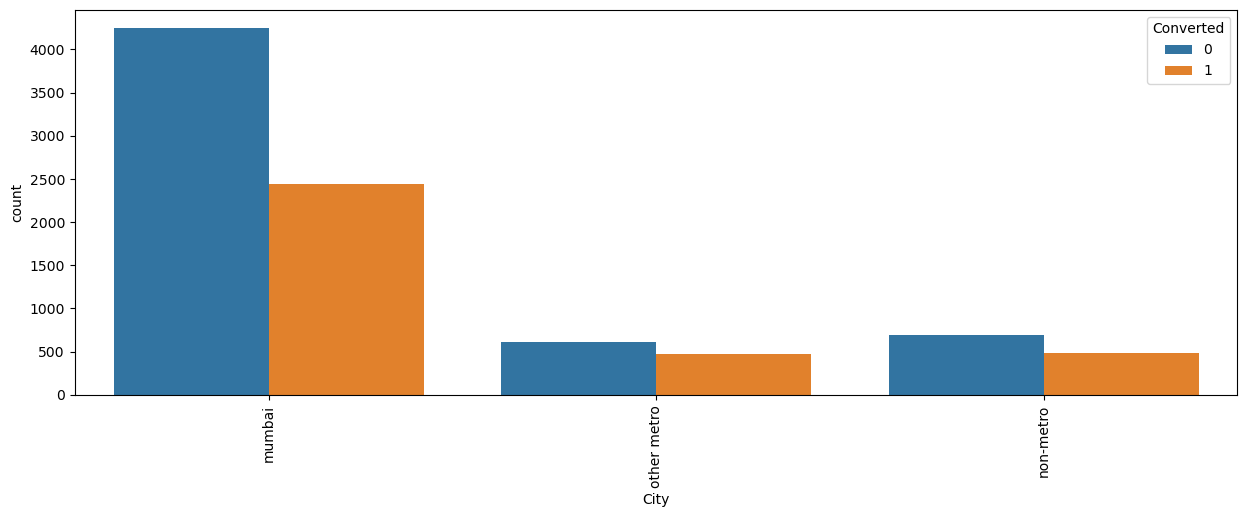

In [100]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'City', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Focus on Mumbai:

Mumbai is the most important city in terms of lead generation and conversion. Although there are more non-conversions, the conversion volume is still the highest among all cities, indicating that marketing efforts in Mumbai can lead to higher returns if optimized effectively.
Low Conversion Cities:

"Thane & Outskirts", "Other Metro Cities", and "Other Cities of Maharashtra" show lower engagement with more non-conversions, suggesting that these areas might not be as effective for focused marketing campaigns.

Feature engineering - binning

29 City - Keep

##### 30 Asymmetrique Activity Index   </br>
31 Asymmetrique Profile Index </br>
32 Asymmetrique Activity Score </br>
33 Asymmetrique Profile Score </br>

As per the Leads Data Dictionary.xlsx these columns are: An index and score assigned to each customer based on their activity and their profile. Asymmetrique Activity Index and Assimetric Profile Index are categorical, while Asymmetric Activity Score and Asymmetrique Profile Score are numerical
I'm interested in the corelation between these features and conversions, but need to consider that they have high null data (+45%)

In [101]:
#checking value counts of City variable
df_leads['Asymmetrique Activity Index'].value_counts(dropna=False)

Asymmetrique Activity Index
NaN          4110
02.medium    3709
01.high       774
03.low        359
Name: count, dtype: int64

In [102]:
#replacing Nan values with "Asymmetrique Activity Index"
df_leads['Asymmetrique Activity Index'] = df_leads['Asymmetrique Activity Index'].replace(np.nan,'Unclassified')
#checking value counts of City variable
df_leads['Asymmetrique Activity Index'].value_counts(dropna=False)

Asymmetrique Activity Index
Unclassified    4110
02.medium       3709
01.high          774
03.low           359
Name: count, dtype: int64

In [103]:
#checking value counts of City variable
df_leads['Asymmetrique Profile Index'].value_counts(dropna=False)

Asymmetrique Profile Index
NaN          4110
02.medium    2705
01.high      2109
03.low         28
Name: count, dtype: int64

In [104]:
#replacing Nan values with "Asymmetrique Profile Index"
df_leads['Asymmetrique Profile Index'] = df_leads['Asymmetrique Profile Index'].replace(np.nan,'Unclassified')
#checking value counts of City variable
df_leads['Asymmetrique Profile Index'].value_counts(dropna=False)

Asymmetrique Profile Index
Unclassified    4110
02.medium       2705
01.high         2109
03.low            28
Name: count, dtype: int64

Because Values are  now numerical a NaN will be replaced by 0

In [113]:
# Binning "Asymmetrique Activity Index"
df_leads['Asymmetrique Activity Index'] = df_leads['Asymmetrique Activity Index'].replace({
    "01.high": 'high',
    "02.medium": 'medium',
    "03.low": 'low'
})

# Binning "Asymmetrique Profile Index"
df_leads['Asymmetrique Profile Index'] = df_leads['Asymmetrique Profile Index'].replace({
    "01.high": 'high',
    "02.medium": 'medium',
    "03.low": 'low'
})

# Display the first few rows of the DataFrame to verify the binning
print(df_leads[['Asymmetrique Activity Index', 'Asymmetrique Activity Index Binned',
                'Asymmetrique Profile Index', 'Asymmetrique Profile Index Binned']].head())

  Asymmetrique Activity Index Asymmetrique Activity Index Binned  \
0                      medium                             medium   
1                      medium                             medium   
2                      medium                             medium   
3                      medium                             medium   
4                      medium                             medium   

  Asymmetrique Profile Index Asymmetrique Profile Index Binned  
0                     medium                            medium  
1                     medium                            medium  
2                       high                              high  
3                       high                              high  
4                       high                              high  


<Axes: xlabel='Converted', ylabel='Asymmetrique Activity Score'>

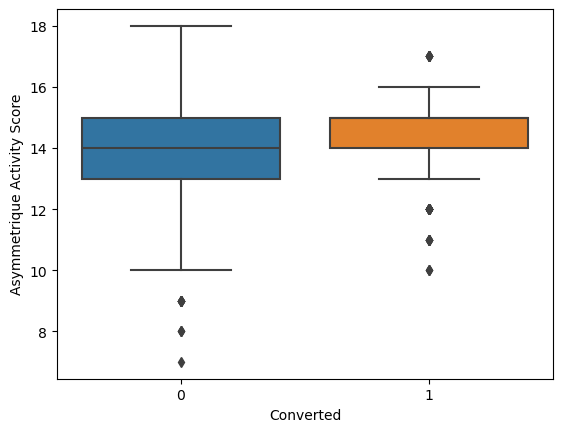

In [117]:
sns.boxplot(y = 'Asymmetrique Activity Score', x = 'Converted', data = df_leads)

In [121]:
Q1 = df_leads['Asymmetrique Activity Score'].quantile(0.25)
Q3 = df_leads['Asymmetrique Activity Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
df_leads['Asymmetrique Activity Score'] = df_leads['Asymmetrique Activity Score'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

Lower Bound: 12.5, Upper Bound: 16.5


<Axes: xlabel='Converted', ylabel='Asymmetrique Activity Score'>

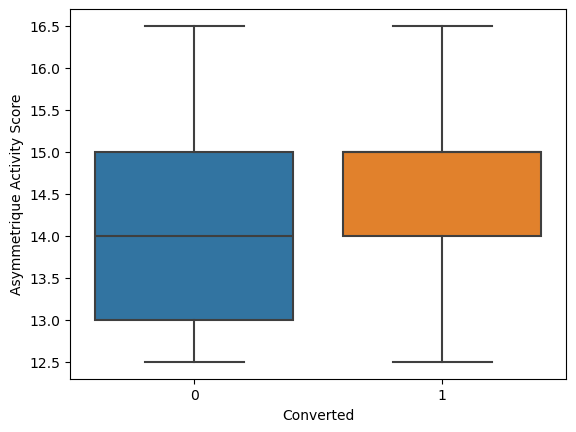

In [124]:
sns.boxplot(y = 'Asymmetrique Activity Score', x = 'Converted', data = df_leads)

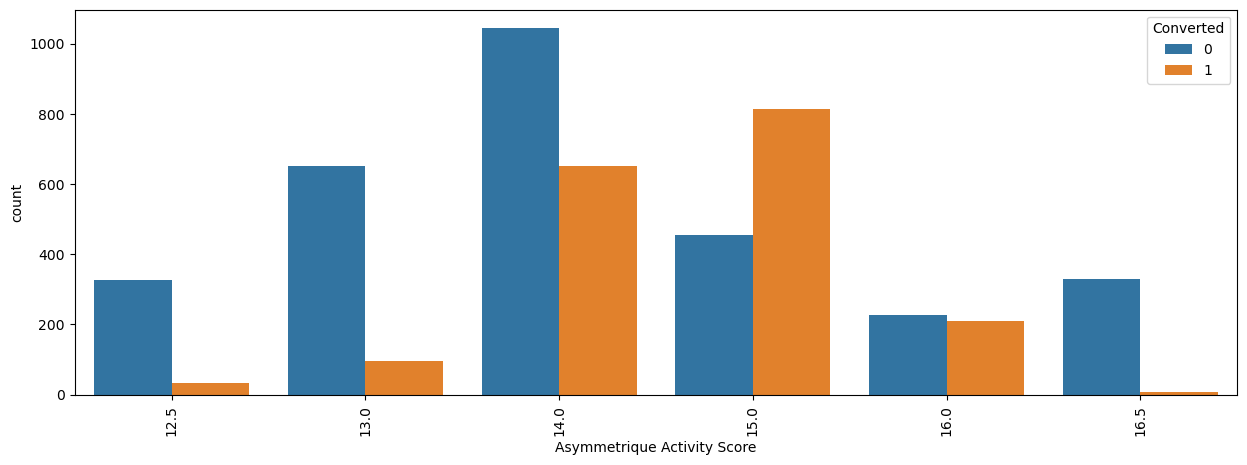

In [122]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Asymmetrique Activity Score', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


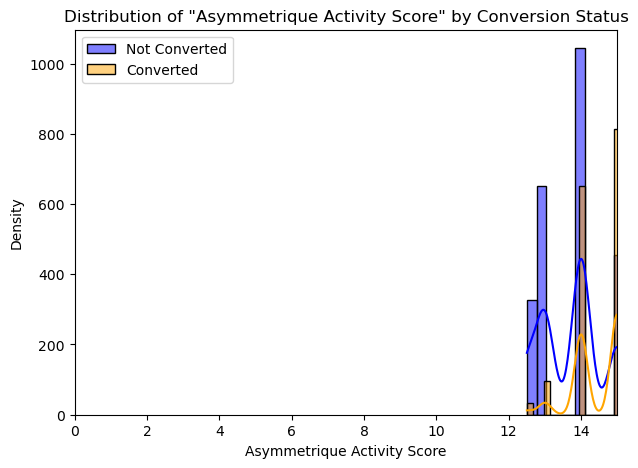

In [123]:
# Plotting the distribution of Total Visits split by Converted and Not Converted with x-axis limit
plt.figure(figsize=(7, 5))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]["Asymmetrique Activity Score"], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]["Asymmetrique Activity Score"], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of "Asymmetrique Activity Score" by Conversion Status')
plt.xlabel("Asymmetrique Activity Score")
plt.ylabel('Density')
plt.xlim(0, 15)  # Limiting the x-axis to 0-15 for better visualization
plt.legend()

plt.show()

<Axes: xlabel='Converted', ylabel='Asymmetrique Profile Score'>

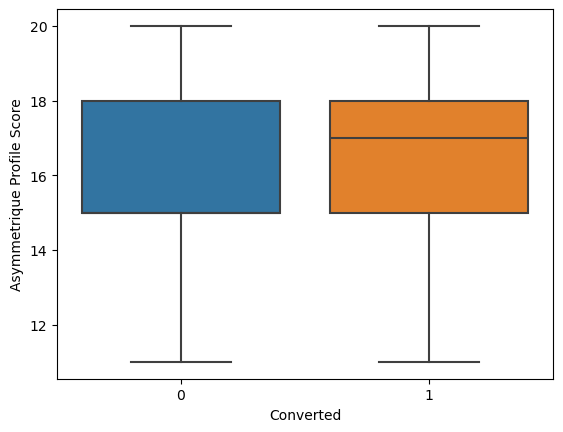

In [118]:
sns.boxplot(y = 'Asymmetrique Profile Score', x = 'Converted', data = df_leads)

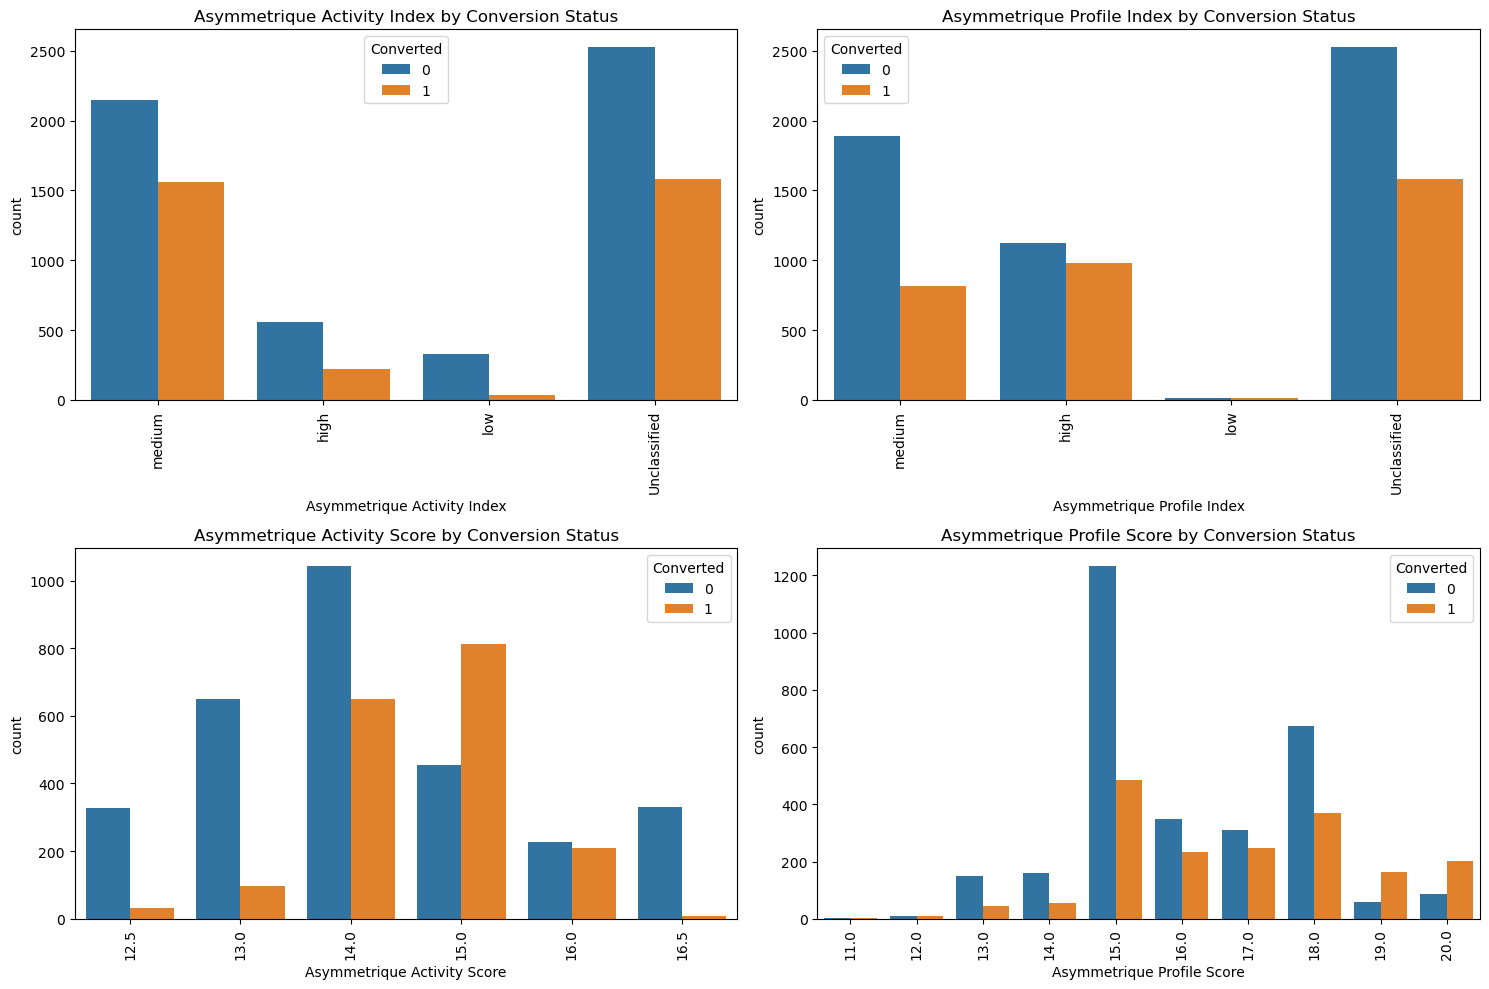

In [126]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 10))  # Adjust the figure size to accommodate 4 subplots

# Plotting 'Asymmetrique Activity Index' with 'Converted' as hue
ax1 = plt.subplot(2, 2, 1)
sns.countplot(x='Asymmetrique Activity Index', hue='Converted', data=df_leads, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title("Asymmetrique Activity Index by Conversion Status")

# Plotting 'Asymmetrique Profile Index' with 'Converted' as hue
ax2 = plt.subplot(2, 2, 2)
sns.countplot(x='Asymmetrique Profile Index', hue='Converted', data=df_leads, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title("Asymmetrique Profile Index by Conversion Status")

# Plotting 'Asymmetrique Activity Score' with 'Converted' as hue
ax3 = plt.subplot(2, 2, 3)
sns.countplot(x='Asymmetrique Activity Score', hue='Converted', data=df_leads, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_title("Asymmetrique Activity Score by Conversion Status")

# Plotting 'Asymmetrique Profile Score' with 'Converted' as hue
ax4 = plt.subplot(2, 2, 4)
sns.countplot(x='Asymmetrique Profile Score', hue='Converted', data=df_leads, ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
ax4.set_title("Asymmetrique Profile Score by Conversion Status")

plt.tight_layout()  # Adjust the spacing between subplots for better visual clarity
plt.show()

Asymmetrique Activity Index by Conversion Status (Top-Left)
Medium: There are significantly more leads with a medium activity index that did not convert (blue) compared to those that converted (orange). However, a considerable number did convert as well.
High and Low: There are fewer leads overall with high and low activity indices, with a slight preference for conversion in the high index group.
Unclassified: A large number of leads are unclassified, with both converted and non-converted leads present in this category.
2. Asymmetrique Profile Index by Conversion Status (Top-Right)
Medium: Similar to the activity index, the medium profile index group shows more non-converted leads, although there is also a notable number of converted leads.
High: Leads with a high profile index tend to convert more frequently compared to those with medium or low indices.
Unclassified: A significant number of leads fall into the unclassified category, and conversion seems reasonably likely for this group.
3. Asymmetrique Activity Score by Conversion Status (Bottom-Left)
The activity score peaks at 14.0 for non-converted leads, whereas converted leads tend to have high counts at 15.0.
There is a noticeable difference in the conversion rates for activity scores between 13.0 and 15.0.
Scores 12.5 and 16.5 have relatively few leads, suggesting these scores may have minimal influence on conversions.
4. Asymmetrique Profile Score by Conversion Status (Bottom-Right)
The profile score of 15.0 has the highest count for non-converted leads, whereas converted leads show more variety, with peaks around 17.0 and 18.0.
Scores of 11.0, 12.0, and 13.0 seem to have low lead counts overall, suggesting they may not be as relevant.

based on some activity on conversion, we will keep for initial  model. the correlation 
Keep the Asymmetrique Activity Score and Profile Score for now since they have weak positive correlations with conversion, indicating they might contribute to the model's performance.
Asymmetrique Activity Index and Profile Index can also be retained initially to provide complementary information.
After training the model, assess the importance of these features, and consider dropping or combining them if they do not contribute significantly.
Use feature selection and importance analysis to decide their final inclusion.

30 Asymmetrique Activity Index - Keep  </br>
31 Asymmetrique Profile Index - Keep </br>
32 Asymmetrique Activity Score - Keep </br>
33 Asymmetrique Profile Score - Keep </br>


##### 34 I agree to pay the amount through cheque </br>


In [130]:
# Calculate the percentage of "no" in the "I agree to pay the amount through cheque" column
no_percentage = (df_leads['I agree to pay the amount through cheque'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'I agree to pay the amount through cheque': {no_percentage:.2f}%")

Percentage of 'no' in 'I agree to pay the amount through cheque': 100.00%


Due to extreme imbalance in this colum (100% of No's), it will be dropped. It likely it won't provide useful information for the model to make accurate predictions, and may instead contribute to overfitting or add unnecessary complexity.

34 I agree to pay the amount through cheque - Dropped </br>

In [132]:
#dropping Update me on Supply Chain Content column 
df_leads.drop(["I agree to pay the amount through cheque"], axis=1, inplace = True)
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Specialization                                 8952 non-n

##### 35 A free copy of Mastering The Interview

In [131]:
# Calculate the percentage of "no" in the "A free copy of Mastering The Interview" column
no_percentage = (df_leads['A free copy of Mastering The Interview'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'A free copy of Mastering The Interview': {no_percentage:.2f}%")

Percentage of 'no' in 'A free copy of Mastering The Interview': 68.74%


In [134]:
#checking total rows and cols in dataset
df_leads.shape

(8952, 24)

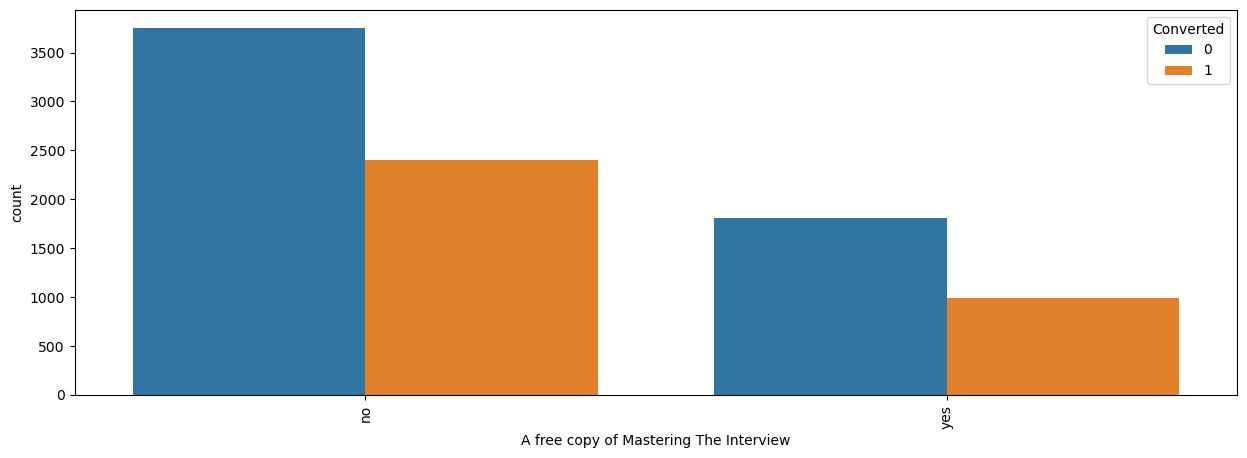

In [133]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

hankding imbalance 

35 A free copy of Mastering The Interview - Keep

##### 36 Last Notable Activity

In [136]:
#checking value counts of last Notable Activity
df_leads['Last Notable Activity'].value_counts()

Last Notable Activity
modified                        3224
email opened                    2789
sms sent                        2143
page visited on website          287
olark chat conversation          182
email link clicked               170
email bounced                     59
unsubscribed                      46
unreachable                       32
had a phone conversation          13
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: count, dtype: int64

In [140]:
# Define a cutoff value
cutoff_value = 150

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Last Notable Activity'].value_counts()[df_leads['Last Notable Activity'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Last Notable Activity'].value_counts())

Last Notable Activity
modified                   3224
email opened               2789
sms sent                   2143
page visited on website     287
olark chat conversation     182
email link clicked          170
Other                       157
Name: count, dtype: int64


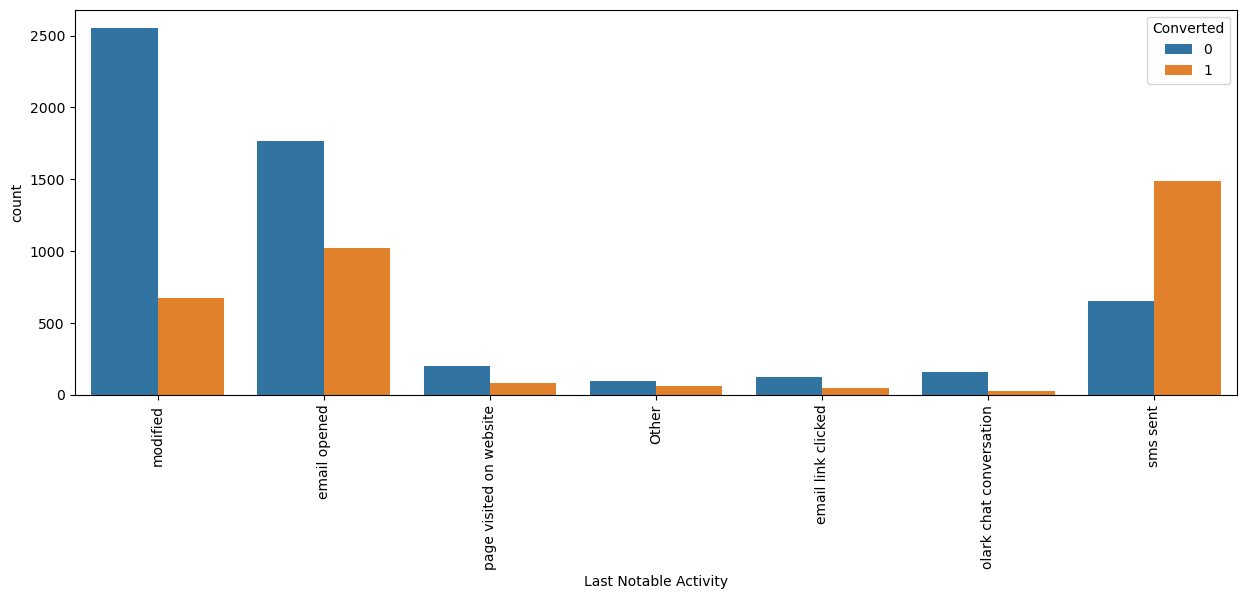

In [143]:
#plotting spread of  Last Notable Activity columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

In [144]:
# Define the categories you want to merge
categories_to_merge = ['page visited on website', 'email link clicked', 'olark chat conversation']

# Merge these categories into a new label, e.g., "Other Activities"
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].replace(categories_to_merge, 'Other Activities')

# Verify the changes
print(df_leads['Last Notable Activity'].value_counts())

Last Notable Activity
modified            3224
email opened        2789
sms sent            2143
Other Activities     639
Other                157
Name: count, dtype: int64


In [148]:
# Define the categories you want to merge
categories_to_merge = ['other', 'page visited on website', 'email link clicked', 'olark chat conversation']

# Merge these categories into a new label, e.g., "Other Activities"
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].replace(categories_to_merge, 'Other Activities')

# Verify the changes
print(df_leads['Last Notable Activity'].value_counts())

Last Notable Activity
modified            3224
email opened        2789
sms sent            2143
Other Activities     639
Other                157
Name: count, dtype: int64


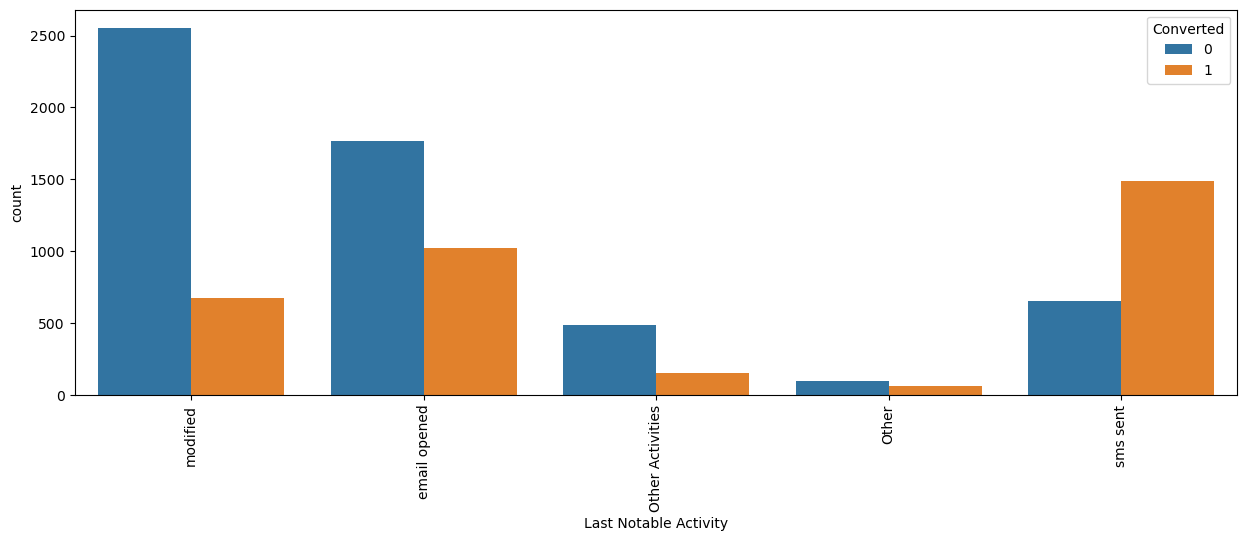

In [149]:
#plotting spread of  Last Notable Activity columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

36 Last Notable Activity - Keep

##### Clean Data Frame

In [150]:
#checking total rows and cols in dataset
df_leads.shape

(8952, 24)

In [151]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8952 non-null   object 
 1   Lead Source                                    8923 non-null   object 
 2   Do Not Email                                   8952 non-null   object 
 3   Do Not Call                                    8952 non-null   object 
 4   Converted                                      8952 non-null   int64  
 5   TotalVisits                                    8952 non-null   float64
 6   Total Time Spent on Website                    8952 non-null   int64  
 7   Page Views Per Visit                           8952 non-null   float64
 8   Last Activity                                  8952 non-null   object 
 9   Specialization                                 8952 non-n

---
---
---

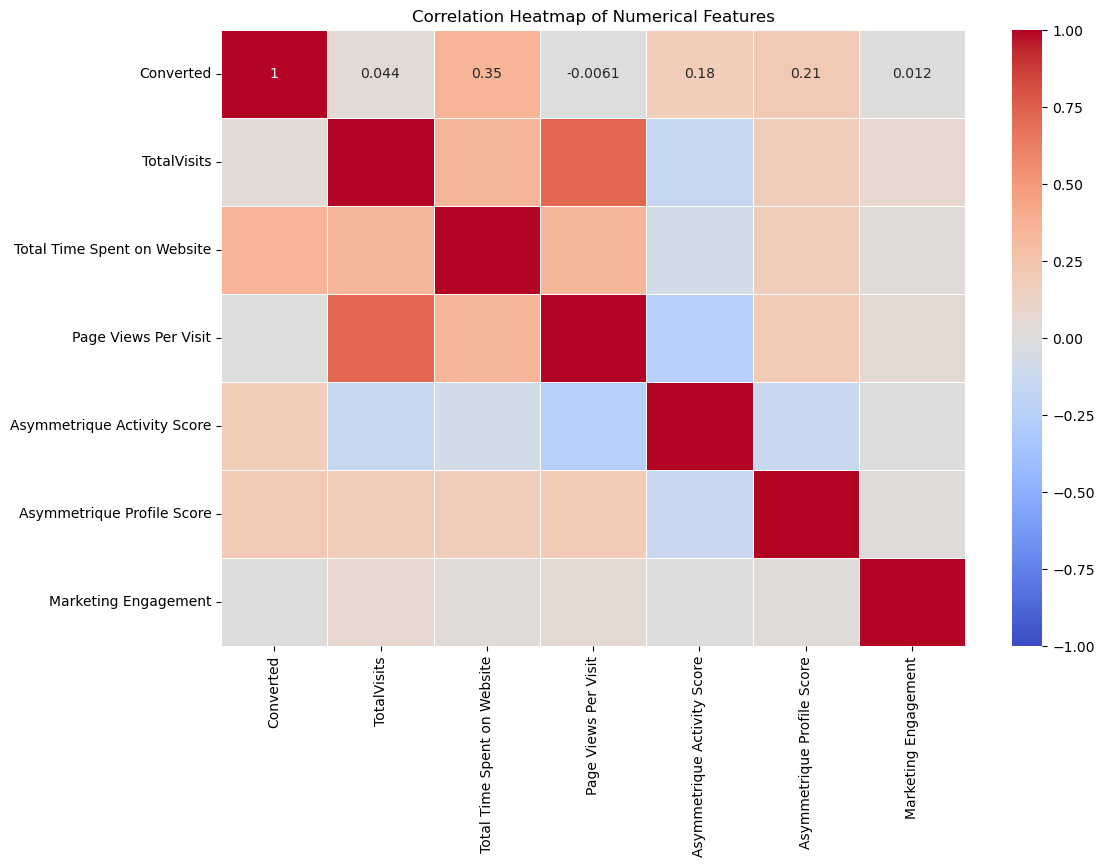

In [128]:
# Selecting only numerical features, including 'Converted'
numerical_features = df_leads.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numerical_features.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

otal Time Spent on Website is the most promising predictor of conversion, while TotalVisits, Page Views Per Visit, and Marketing Engagement are less correlated with conversion.
Address highly correlated features by either removing one of them or combining them.
Perform feature transformation and engineering to explore more complex relationships between features.
Run a feature importance analysis to verify and refine your selected features before modeling.
Total Time Spent on Website has a positive correlation of 0.35 with Converted, which suggests that leads who spend more time on the website are more likely to convert. This feature is moderately correlated and is a good predictor for conversion.
Asymmetrique Activity Score and Asymmetrique Profile Score have correlations of 0.18 and 0.21, respectively, with Converted. These correlations are relatively weak but still positive, indicating some impact on conversion.
TotalVisits and Page Views Per Visit have very low correlations (0.044 and -0.0061) with Converted, suggesting that they might not have a significant effect on conversion. These features may require further transformation or even removal.
Marketing Engagement has a very low correlation (0.012) with Converted, suggesting it may have little predictive power.

##### Numerical Missing Data



In [ ]:
# Filter to show only columns with dtype 'float64' or 'int64' and null values greater than 0
df_null_dtype_numeric_with_nulls = df_null_dtype[
    ((df_null_dtype['Dtype'] == 'float64') | (df_null_dtype['Dtype'] == 'int64')) & (df_null_dtype['Null Values'] > 0)
]

# Display the filtered summary DataFrame
print(df_null_dtype_numeric_with_nulls)

##### Numerical Data cleaning 
- [TotalVisits](#totalvisits)
- [Page Views Per Visit](#page-views-per-visit)

TotalVisits
Page Views Per Visit
Asymmetrique columns have values 1, 2, 3 which is score assigned to each customer based on their activity and their profile. Will replace blank with 0 score.
Page Visits nulls will be be replaced with 0.

!!!The Median for converted 

Most users/customers are visiting fewer times, with very few having higher visit counts.
The positive skew indicates that there might be some outliers or a small group of users who have a significantly higher number of visits compared to the rest.
This distribution can be useful in understanding the behavior of users/customers, showing that a majority do not make frequent visits, while a smaller proportion are more engaged.

##### Page Views Per Visit

In [ ]:
df_leads['Page Views Per Visit'].describe()

In [ ]:
sns.boxplot(df_leads['Page Views Per Visit'])

There are outliers in the data, cap the outliers to 95%for analysis

In [ ]:
#checking percentile values for "Page Views Per Visit"

df_leads['Page Views Per Visit'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

In [ ]:
#Outlier Treatment: Remove top & bottom 5% of the Column Outlier values

Q3 = df_leads["Page Views Per Visit"].quantile(0.95)
df_leads = df_leads[(df_leads["Page Views Per Visit"] <= Q3)]
Q1 = df_leads["Page Views Per Visit"].quantile(0.05)
df_leads = df_leads[(df_leads["Page Views Per Visit"] >= Q1)]
sns.boxplot(y=df_leads['TotalVisits'])
plt.show()

In [ ]:

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)

In [ ]:
# Calculate skewness
skewness = skew(df_leads['Page Views Per Visit'])
skewness_rounded = round(skewness, 2)

# Plotting the distribution
sns.histplot(df_leads['Page Views Per Visit'], kde=True,  color='blue', stat="density", bins=30)
plt.title(f"Skewness of Page Views Per Visit = {skewness_rounded}")
plt.xlabel('Page Views Per Visit')
plt.ylabel('Density')
plt.show()

!!Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit
Most users seem to view 1-2 pages per visit, with fewer users viewing more than that.
The distribution has some minor peaks indicating that there are distinct groups of users who tend to view a specific number of pages, such as 2, 3, or 4 pages, before exiting.
Overall, the skewness is low, which means that while the data is slightly skewed to the right, it is relatively balanced, with no extreme outliers.
This suggests that while most users view only a few pages per visit, there is still a significant portion of users viewing a moderate number of pages, indicating a varied level of engagement across different visitors.

##### Tags

In [ ]:
#checking value counts of Tag variable
df_leads['Tags'].value_counts(dropna=False)


In [ ]:
#plotting spread of Tags columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Tags', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

---

### Correlation

In [ ]:
# Selecting only the numerical columns
numerical_df = df_leads.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

# Displaying the correlation matrix
print(correlation_matrix)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Converted vs. Total Time Spent on Website: There is a moderate positive correlation (0.35) between "Converted" and "Total Time Spent on Website". This indicates that leads that spend more time on the website are more likely to convert.

Converted vs. TotalVisits: There is a very weak positive correlation (0.05) between "Converted" and "TotalVisits". This suggests that the number of total visits to the website does not strongly influence whether a lead converts or not.

Converted vs. Page Views Per Visit: There is an extremely weak negative correlation (-0.0049) between "Converted" and "Page Views Per Visit", implying that page views per visit do not have much impact on conversions.

Correlation among the features:

TotalVisits vs. Page Views Per Visit: There is a moderate positive correlation, which suggests that more total visits are generally associated with a higher number of page views per visit.
TotalVisits vs. Total Time Spent on Website: There is a moderate positive correlation, meaning that an increase in total visits is generally associated with more time spent on the website.
TotalVisits_sqrt is likely a transformed version of "TotalVisits", and it also shows moderate correlations with the other variables, which might have been created to normalize the distribution.
In summary, "Total Time Spent on Website" is the only variable with a somewhat meaningful correlation with conversion, indicating that investing efforts in increasing time spent on the website might lead to better conversion rates. Other variables, such as "TotalVisits" and "Page Views Per Visit," do not seem to have a strong effect on conversion.

In [ ]:
sample_size = min(len(df_leads), 10000)
subset = df_leads.sample(n=sample_size, random_state=42)
correlation_matrix = subset.corr()

### Heatmap

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## Feature Engineering and Transformation

### Discretization
- Convert continuous variables into discrete ones if necessary (e.g., binning).


### Categorical Encoding
- Use one-hot encoding for categorical features.

### Variable Transformation
- Apply log or square-root transformations for skewed data.

### Scaling
- Normalize or standardize numerical features.

### Dimensionality Reduction
- Use Principal Component Analysis (PCA) to reduce feature dimensions.

## Model Implementation

### Supervised Learning
- Logistic Regression, Decision Trees, Random Forest, Neural Networks.

### Model Evaluation
- Calculate baseline metric (accuracy, precision, recall) and performance on unseen data.


## Model Optimization

### Hyperparameter Tuning
- Grid search, random search.

### Regularization
- Optional L2 regularization.

### Visualizations
- Learning curves, feature importance, showing iterative improvements.

## Presentation

### Clear Objectives
- Communicate the problem statement and solution.

### Model Performance
- Use visualizations (learning curves, comparison of models).

### Interactivity (Optional)
- If meaningful, incorporate interactive visualizations.